<a href="https://colab.research.google.com/github/Phytoplankt0n/Tutorial-Git/blob/main/Data_Visualization_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This Colab is intented to summarize the main aspects of data visualization, with the use of `ggplot` package from R programming laguage. Several packages are used in addition to ggplot, and in order to learn how to use them, different plots as examples will be made through the Colab.

So why is important to visualize data? Data visualization is a key component of exploratory data analysis (EDA), in which the properties of data are explored through visualization and summarization techniques. It can also help discover biases, systematic errors, mistakes and other unexpected problems in data before those data are incorporated into potentially flawed analysis.

In [1]:
install.packages(c("tidyverse", "dslabs", "dplyr", "gridExtra", "ggrepel", "ggthemes", "NHANES", "titanic"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library(dslabs)
library(tidyverse)
library(dplyr)
library(gridExtra)
library(ggrepel)
library(ggthemes)
library(NHANES)
library(titanic)

# Variables

The most basic statistical summary of a list of objects is its distribution.

Categorical data are variables that are defined by a small number of groups.

*   Ordinal categorical data have an inherent order to the categories (mild/medium/hot, for example).

* Non-ordinal categorical data have no order to the categories.

Numerical data take a variety of numeric values.

* Continuous variables can take any value.

* Discrete variables are limited to sets of specific values.


Using the *heights* data, we want to know how many different heights were reported.

In [4]:
library(dslabs)
data(heights)
x <- heights$height
length(unique(x))

[1] 139

One of the useful outputs of data visualization is that we can learn about the distribution of variables. For categorical data we can construct this distribution by simply computing the frequency of each unique value. This can be done with the function table

In [5]:
tab <- table(x)
head(tab, 10)

x
     50      51      52      53   53.77      54      55      58      59 59.0551 
      2       1       2       1       1       1       1       1       6       1 

We can use the function Sum to count the number of times the variable Tab has value = 1

In [6]:
sum(tab==1)

[1] 63

A frequency table is the simplest way to show a categorical distribution. We use prop.table() to convert a table of counts to a frequency table. Below we have a code that describes the proportiosn of male and females records that the variable Height has.

In [7]:
prop.table(table(heights$sex))


   Female      Male 
0.2266667 0.7733333 

# Distributions

**Cumulative distribution function**

Every continuous distribution has a *cumulative distribution function* (CDF). The CDF defines the proportion of the data below a given value `a` for all values of `a`:

F(a) = Pr(x $\le$ a)

Any continuous dataset has a CDF, not only normal distributions.
The CDF is essential for calculating probabilities related to continuous data.

For datasets that are not normal, the CDF can be calculated manually by defining a function to compute the probability above.

Given a dataset *my_data*, the CDF can be calculated and plotted like this:

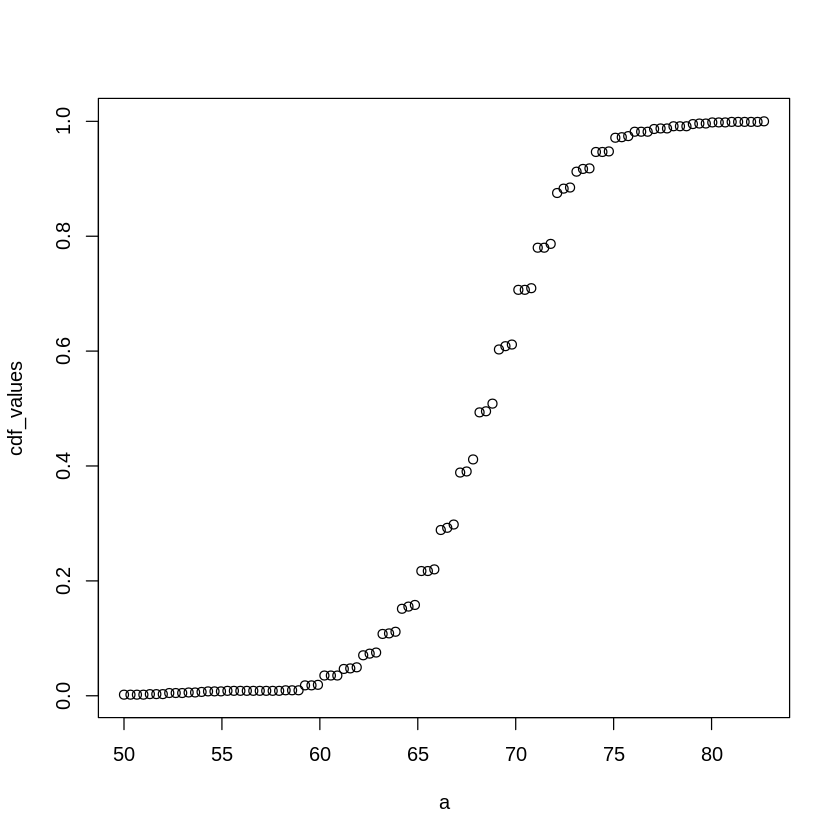

In [8]:
my_data <- heights$height

# a is the heights reported in inches
a <- seq(min(my_data), max(my_data), length = 100)    # define range of values spanning the dataset
cdf_function <- function(x) {    # computes prob. for a single value
    mean(my_data <= x)
}
cdf_values <- sapply(a, cdf_function)
plot(a, cdf_values)

Smooth density plots can be thought of as histograms where the bin width is extremely or infinitely small. The smoothing function makes estimates of the true continuous trend of the data given the available sample of data points.

While the histogram is an assumption-free summary, the smooth density plot is shaped by assumptions and choices made as a data analyst.

The y-axis is scaled so that the area under the density curve sums to 1. This means that interpreting values on the y-axis is not straightforward. To determine the proportion of data in between two values, is necessary to compute the area under the smooth density curve in the region between those values.

**The normal distribution**

The normal distribution is mathematically defined by the following formula for any mean $\mu$ and standard deviation $\sigma$ :

$Pr(a<x<b)=\int_a^b \frac{1}{\sqrt(2\pi)\sigma}e^{-\frac{1}{2}\big( \frac{x-\mu}{\sigma}\big)^2}dx$

* It's centered around one value, the mean $(\mu)$

* It's symmetric around the mean

* It's defined completely by its mean and standard deviation $(\sigma)$

* Always has the same proportion of observations within a given distance of the mean (for example, 95% within 2$\sigma$)

* The standard deviation is the average distance between a value and the mean value.

* Standard units describe how many standard deviations a value is away from the mean. The z-score, or number of standard deviations, is defined as:
$Z=\frac{x-\mu}{\sigma}$

We compute standard units with the `scale()` function.

In [13]:
# Define x as vector of male heights
data(heights)
index <- heights$sex=="Male"
x <- heights$height[index]

# Calculate the mean and standard deviation manually
average <- sum(x)/length(x)
SD <- sqrt(sum((x - average)^2)/length(x))

# Mean and sd functions
average <- mean(x)
SD <- sd(x)
c(average = average)
c(SD = SD)

# Calculate standard units
# The scale function converts a vector of approximately normally distributed values into z-scores.
z <- scale(x)

# Calculate proportion of values within 2 SD of mean
# To calculate the proportion of values that meet a certain condition, use the mean() function on a logical vector.
# Because TRUE is converted to 1 and FALSE is converted to 0, taking the mean of this vector yields the proportion of TRUE.
c(proportion_values_between_2SD = mean(abs(z) < 2))

average 
69.31475

SD 
3.611024

proportion_values_between_2SD 
                    0.9495074

The normal distribution is associated with the 68-95-99.7 rule.
This rule describes the probability of observing events within a certain number of standard deviations of the mean.

The probability distribution function for the normal distribution is defined such that:

* About 68% of observations will be within one standard deviation of the mean ($\mu \pm \sigma$). In standard units, this is equivalent to a z-score of $|Z| \leq 1$.

* About 95% of observations will be within two standard deviations of the mean ($\mu \pm 2\sigma$). In standard units, this is equivalent to a z-score of $|Z| \leq 2$.

* About 99.7% of observations will be within three standard deviations of the mean ($\mu \pm 3\sigma$). In standard units, this is equivalent to a z-score of $|Z| \leq 3$.

The normal distribution has a mathematically defined CDF which can be computed in R with the function `pnorm()`.

`pnorm(a, avg, s)` gives the value of the cumulative distribution function for the normal distribution defined by average `avg` and standard deviation `s`.

In [15]:
library(dplyr)

# Compute the male heights on x
x <- heights %>% filter(sex=="Male") %>% pull(height)

# We can estimate the probability that a male is taller than 70.5 inches with:
c(prob_male_higher_70in = 1 - pnorm(70.5, mean(x), sd(x)))

prob_male_higher_70in 
             0.371369

# Quantiles

Quantiles are cutoff points that divide a dataset into intervals with set probabilities. The $q$th quantile is the value at which $q\%$ of the observations are equal to or less than that value.

Given a dataset data and desired quantile $q$, you can find the $q$th quantile of data with:
`quantile(data,q)`

Percentiles are the quantiles that divide a dataset into 100 intervals each with 1% probability. Thry are the quantiles obtained when defining $p$ as (0.01, ..., 0.99). They summarize the values at which a certain percent of the observations are equal to or less than that value.

Percentiles of a dataset data can be determined like this:

`p <- seq(0.01, 0.99, 0.01)`

`percentiles <- quantile(data, p)`

Note that `quantile()` returns a named vector.

Quartiles divide a dataset into 4 parts each with 25% probability. The 25th percentile is also known as the 1st quartile, the 50th percentile is also known as the median, and the 75th percentile is also known as the 3rd quartile.

The `summary()` function returns the minimum, quartiles and maximum of a vector.




**Qnorm**

The `qnorm()` function gives the theoretical value of a quantile with probability $p$ of observing a value equal to or less than that quantile value given a normal distribution with mean mu and standard deviation sigma:

`qnorm(p, mu, sigma)`

By default, $mu$=0 and $sigma$=1. Therefore, calling `qnorm()` with no arguments gives quantiles for the standard normal distribution.

**Relation to pnorm**

The `pnorm()` function gives the probability that a value from a standard normal distribution will be less than or equal to a $z-score$ value.

`qnorm()` and `pnorm()` are inverse functions:

In [ ]:
pnorm(qnorm(0.025))

[1] 0.025

`qnorm()` can be used to determine the theoretical value of quantiles assuming that a dataset follows a normal distribution. Just run the `qnorm()` function with the desired probabilities $p$, mean $mu$ and standard deviation $sigma$.

Theoretical quantiles can be compared to sample quantiles determined with the quantile function in order to evaluate whether the sample follows a normal distribution.

*Quantile-quantile* plots, or *QQ-plots*, are used to check whether distributions are well-approximated by a normal distribution.

Given a proportion $p$, the quantile $q$ is the value such that the proportion of values in the data below $q$ is $p$.

In a *QQ-plot*, the sample quantiles in the observed data are compared to the theoretical quantiles expected from the normal distribution. If the data are well-approximated by the normal distribution, then the points on the *QQ-plot* will fall near the identity line (sample = theoretical).

mean_heights_below_69 
            0.5147783

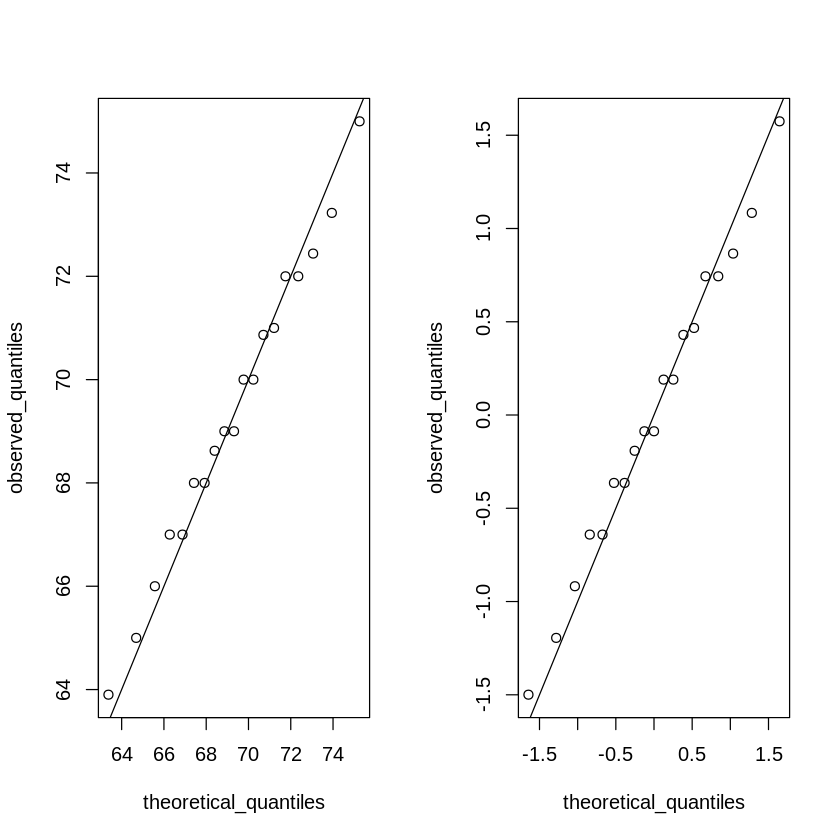

In [17]:
# define x and z
data(heights)
index <- heights$sex=="Male"
x <- heights$height[index]
z <- scale(x)

# proportion of data below 69.5
c(mean_heights_below_69 = mean(x <= 69.5))

# calculate observed and theoretical quantiles
p <- seq(0.05, 0.95, 0.05)
observed_quantiles <- quantile(x, p)
theoretical_quantiles <- qnorm(p, mean = mean(x), sd = sd(x))

# split the plot. Plot 1 row and two columns.
par(mfrow = c(1, 2))

# make QQ-plot
plot(theoretical_quantiles, observed_quantiles)
abline(0,1)

# make QQ-plot with scaled values
observed_quantiles <- quantile(z, p)
theoretical_quantiles <- qnorm(p)
plot(theoretical_quantiles, observed_quantiles)
abline(0,1)

# Boxplots for non-normal distributions

When data do not follow a normal distribution and cannot be succinctly summarized by only the mean and standard deviation, an alternative is to report a five-number summary: range (ignoring outliers) and the quartiles (25th, 50th, 75th percentile).

In a boxplot, the box is defined by the 25th and 75th percentiles and the median is a horizontal line through the box. The whiskers show the range excluding outliers, and outliers are plotted separately as individual points.

The interquartile range is the distance between the 25th and 75th percentiles.

**Example**

Suppose we can't make a plot and want to compare the distributions side by side. Let's look at the percentiles.

We're going to create two five row vectors showing the 10th, 30th, 50th, 70th, and 90th percentiles for the heights of each sex called these vectors "female_percentiles" and "male_percentiles".

Then we're going to create a data frame called "df" with these two vectors as columns.


In [18]:
library(dslabs)
data(heights)
male <- heights$height[heights$sex=="Male"]
female <- heights$height[heights$sex=="Female"]
female_percentiles <- quantile(female, probs = c(0.1, 0.3, 0.5, 0.7, 0.9))
male_percentiles <- quantile(male, probs = c(0.1, 0.3, 0.5, 0.7, 0.9))
df <- data.frame(female <- (female_percentiles), male <- c(male_percentiles))
df

,female.....female_percentiles.,male....c.male_percentiles.
,<dbl>,<dbl>
10%,61.00000,65.00000
30%,63.00000,68.00000
50%,64.98031,69.00000
70%,66.46417,71.00000
90%,69.00000,73.22751


# Basics of ggplot2

Plots in ggplot2 consist of 3 main components:

*   Data: The dataset being summarized
*   Geometry: The type of plot (scatterplot, boxplot, barplot, histogram, qqplot, smooth density, etc.)
*   Aesthetic mapping: Variables mapped to visual cues, such as x-axis and y-axis values and color
         
There are additional components:

*   Scale
*   Labels, Title, Legend
*   Theme/Style

A dataset x can be asociated with a ggplot object with any of the 3 commands:

*   ggplot(data = x)
*   ggplot(x)
*   x %>% ggplot()

In ggplot2, graphs are created by adding *layers* to the ggplot object:
`DATA %>% ggplot() + LAYER_1 + LAYER_2 + ... + LAYER_N`

The *geometry layer* defines the plot type and takes the format `geom_X` where `X` is the plot type.

*Aesthetic mappings* describe how properties of the data connect with features of the graph (axis position, color, size, etc.) Define aesthetic mappings with the `aes()` function.

`aes()` uses variable names from the object component (for example, total rather than murders$total).

`geom_point()` creates a scatterplot and requires $x$ and $y$ aesthetic mappings.

`geom_text()` and `geom_label()` add text to a scatterplot and require $x$, $y$, and label aesthetic mappings.

Below is a plot using all these variables as an example.

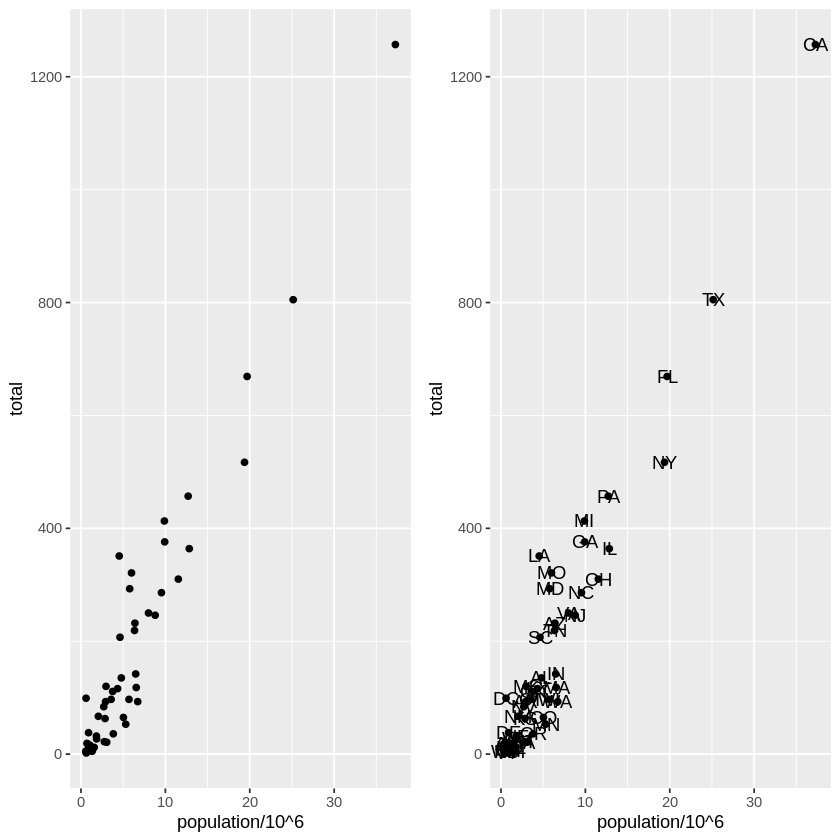

In [ ]:
# example plot
data(murders)

# add points layer to predefined ggplot object
p1 <- ggplot(data = murders) + geom_point(aes(population/10^6, total))

# add text layer to scatterplot
p2 <- ggplot(data = murders) + geom_point(aes(population/10^6, total)) + geom_text(aes(population/10^6, total, label = abb))

# Arrange the plots side by side
grid.arrange(p1, p2, ncol=2)

Global aesthetic mappings apply to all geometries and can be defined when you initially call `ggplot()`. All the geometries added as layers will default to this mapping.

Notice that local aesthetic mappings add additional information or override the default mappings.

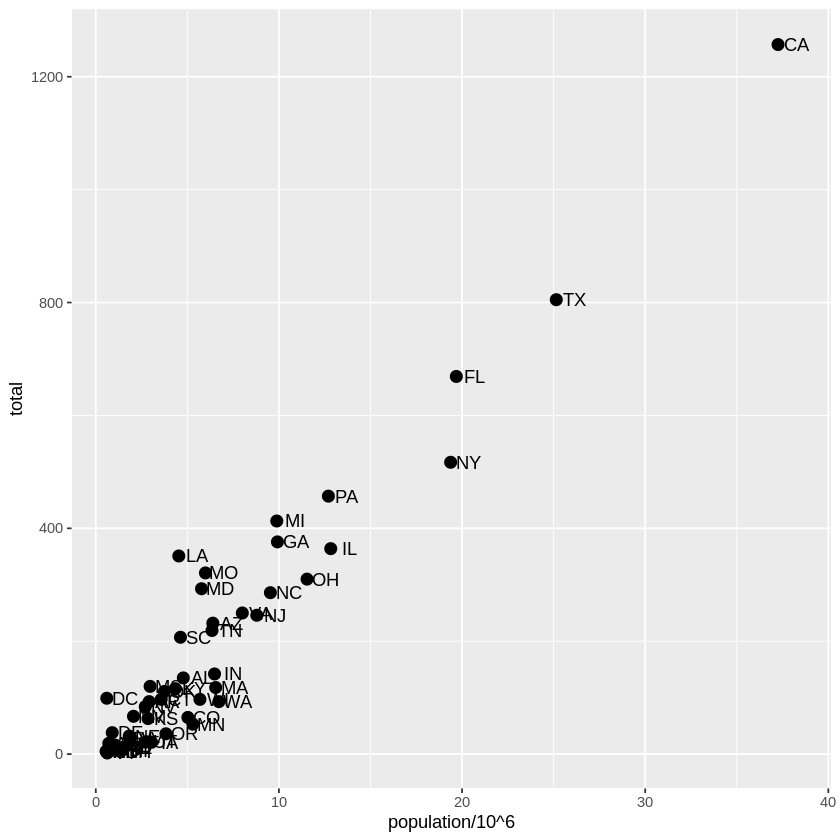

Warning message in geom_text(aes(x = 10, y = 800, label = "Hello there!")):
“All aesthetics have length 1, but the data has 51 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”


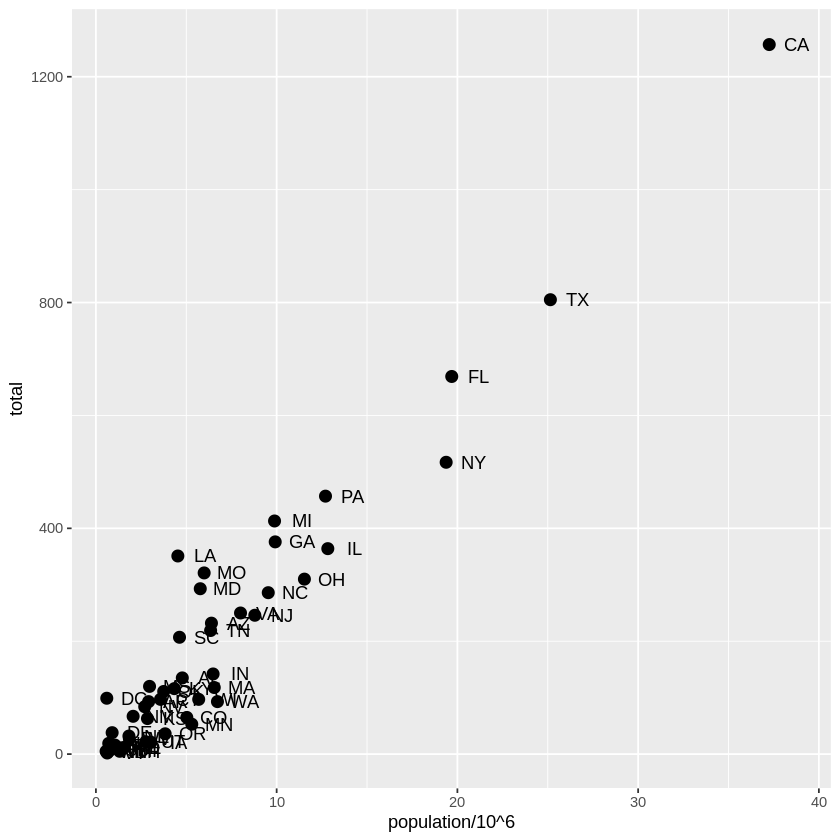

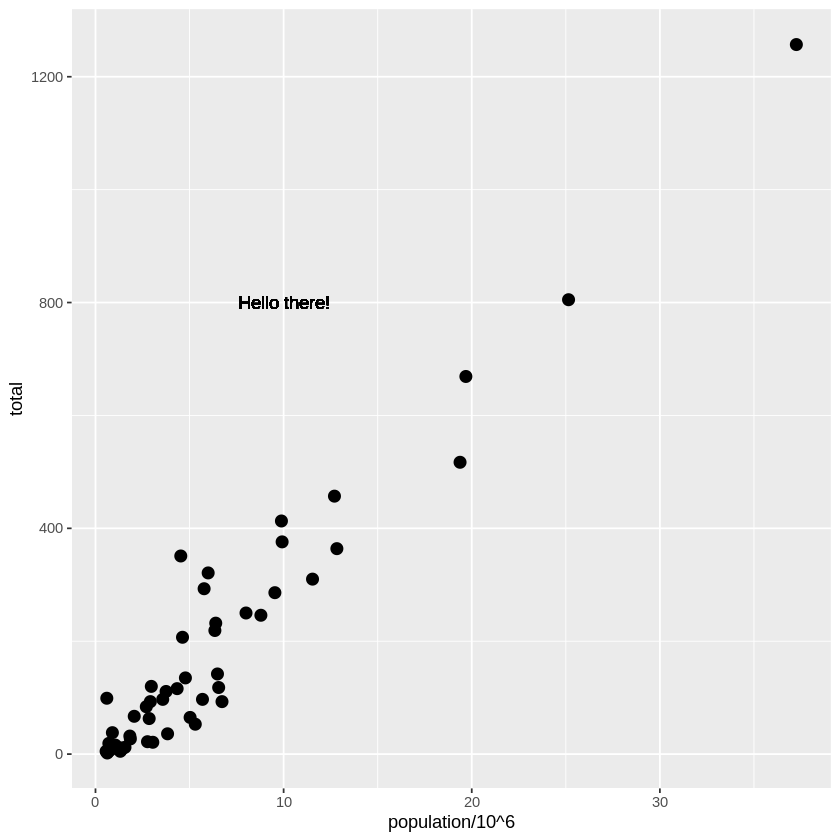

In [19]:
# change the size of the points and move text labels slightly to the right
p3 <- ggplot(data = murders) + geom_point(aes(population/10^6, total), size = 3) +
    geom_text(aes(population/10^6, total, label = abb), nudge_x = 1)
p3

# simplify code by adding global aesthetic
p4 <- murders %>% ggplot(aes(population/10^6, total, label = abb)) + geom_point(size = 3) +
    geom_text(nudge_x = 1.5)
p4

# local aesthetics override global aesthetics
p5 <- murders %>% ggplot(aes(population/10^6, total, label = abb)) + geom_point(size = 3) +
    geom_text(aes(x = 10, y = 800, label = "Hello there!"))
p5

Let us modify the graph so that it becomes more informative:

1. Log Scale

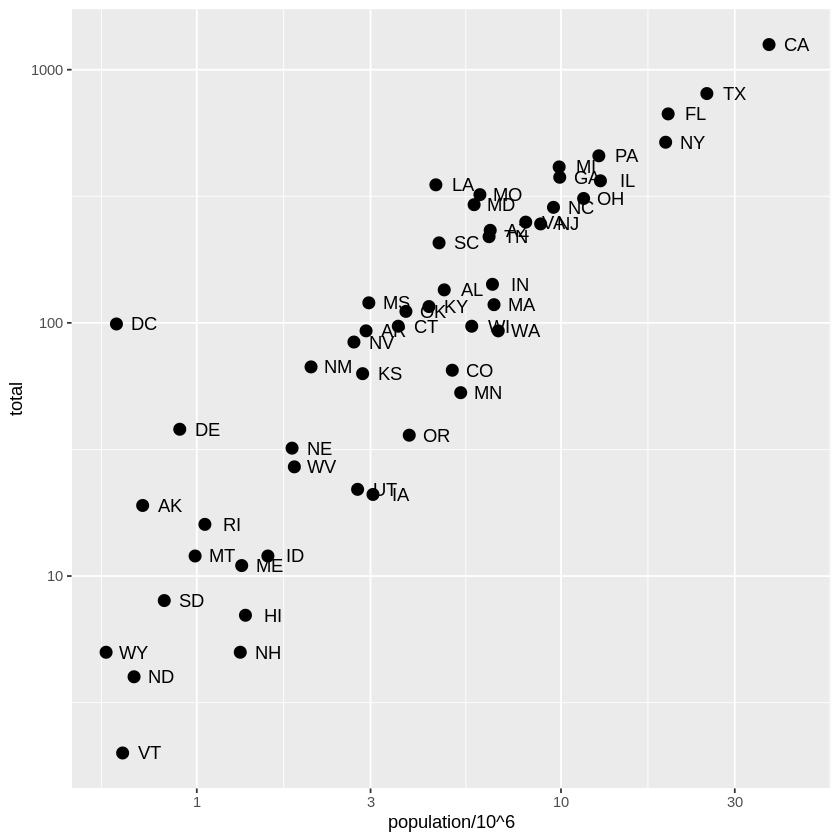

In [20]:
# define p
data(murders)

p <- murders %>% ggplot(aes(population/10^6, total, label = abb))

p + geom_point(size = 3) + # increases size of points
    geom_text(nudge_x = 0.075) + # moves points legends
    scale_x_log10() + #transforms x (and y) axis to log base 10
    scale_y_log10()

2. Add Lables and Titles

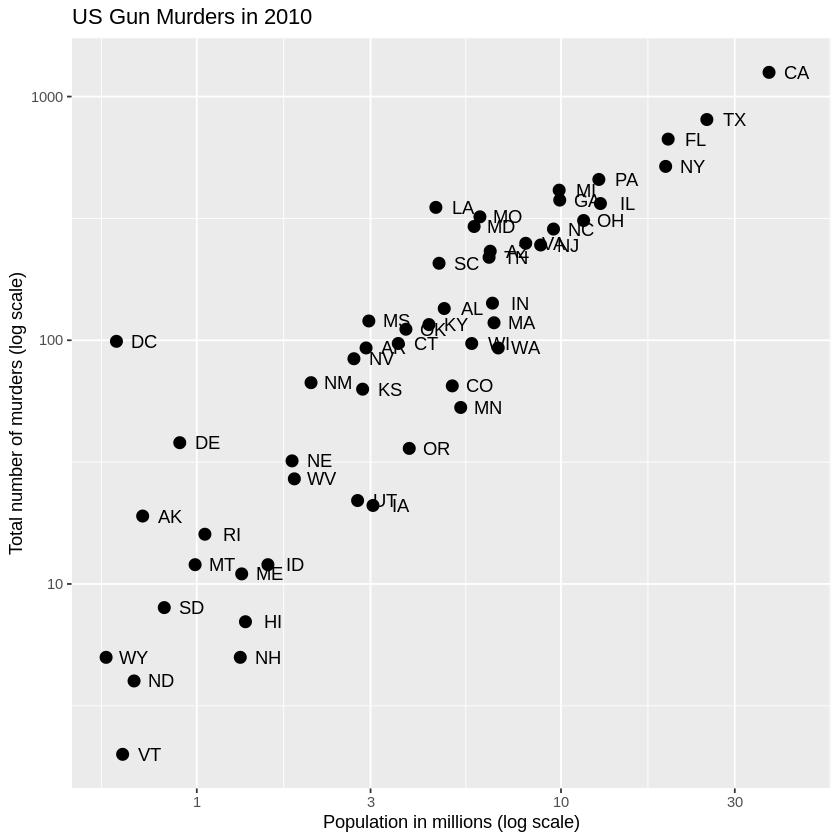

In [21]:
p + geom_point(size = 3) +
    geom_text(nudge_x = 0.075) +
    scale_x_log10() +
    scale_y_log10() +
    xlab("Population in millions (log scale)") + # x lable
    ylab("Total number of murders (log scale)") + # y lable
    ggtitle("US Gun Murders in 2010") # Title

3. Coloring Points

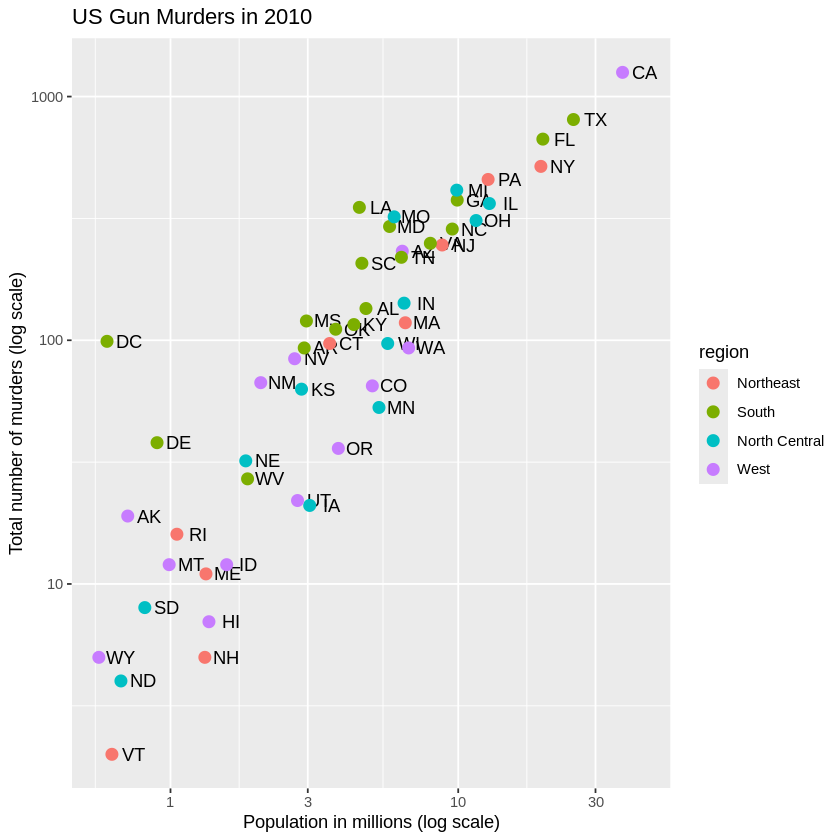

In [22]:
# redefine p to be everything except the points layer
p <- murders %>%
    ggplot(aes(population/10^6, total, label = abb)) +
    # geom_point(size = 3) +
    geom_text(nudge_x = 0.075) +
    scale_x_log10() +
    scale_y_log10() +
    xlab("Population in millions (log scale)") +
    ylab("Total number of murders (log scale)") +
    ggtitle("US Gun Murders in 2010")

# color points by region
p + geom_point(aes(col = region), size = 3)

4. Average Murder Rate

Note that line type (`lty`) can be specified using either text (“blank”, “solid”, “dashed”, “dotted”, “dotdash”, “longdash”, “twodash”) or number (0, 1, 2, 3, 4, 5, 6).

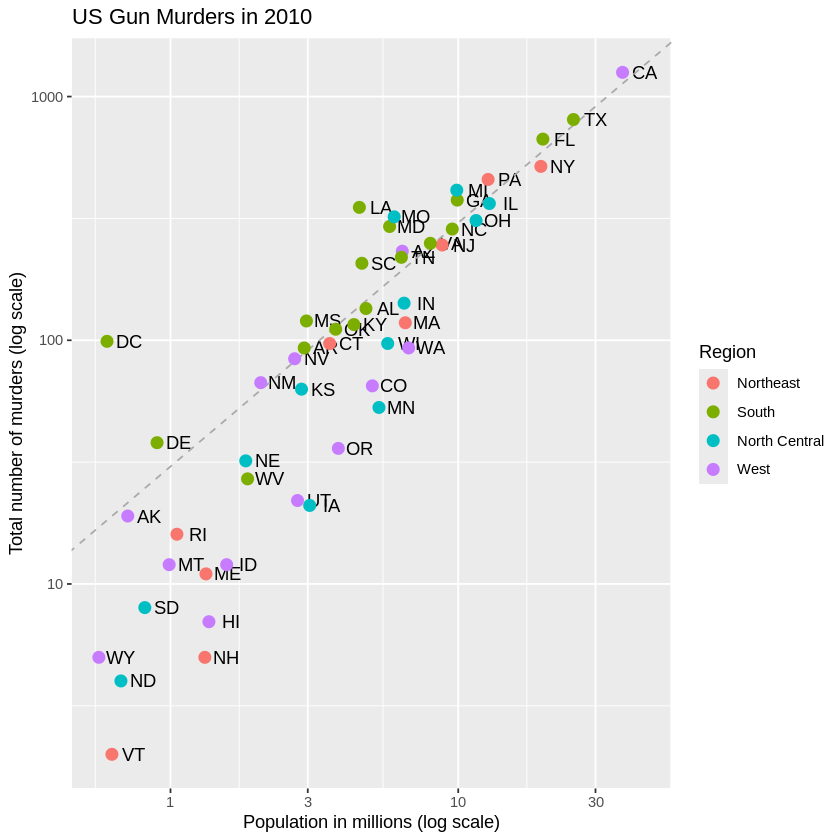

In [23]:
# define average murder rate
r <- murders %>%
    summarize(rate = sum(total) / sum(population) * 10^6) %>%
    pull(rate)

# change line to dashed and dark grey, line under points
p <- p + geom_abline(intercept = log10(r), lty = 2, color = "darkgrey") + # slope is default of 1
    geom_point(aes(col = region), size = 3)

# capitalize legend title
p + scale_color_discrete(name = "Region")

5. Adding Themes

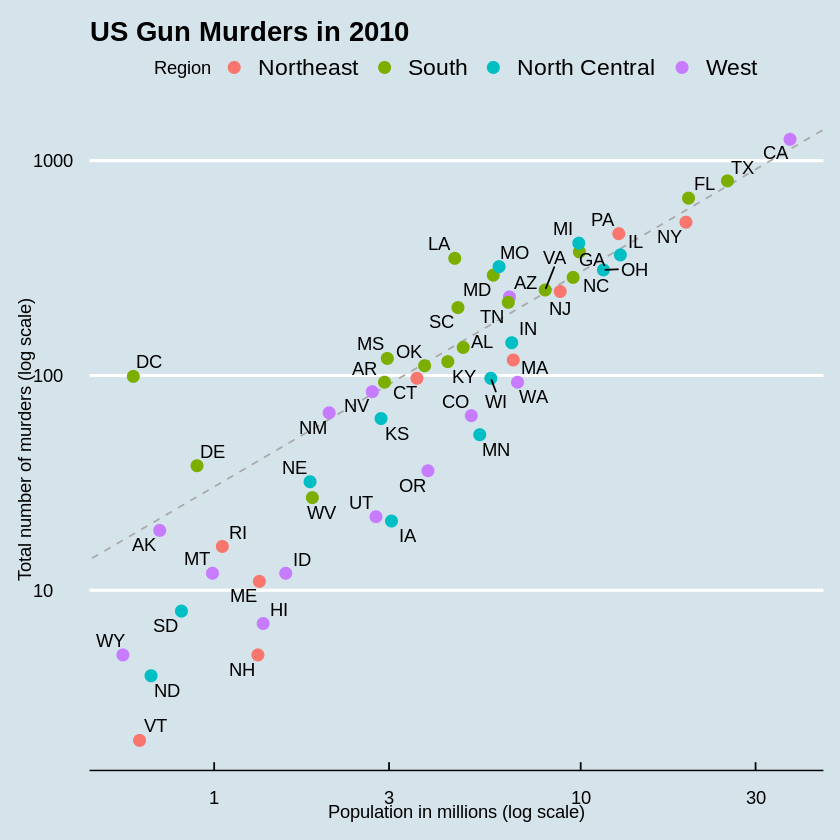

In [24]:
# theme used in course
ds_theme_set()

data(murders)

# define the intercept
r <- murders %>%
    summarize(rate = sum(total) / sum(population) * 10^6) %>%
    .$rate

# make the plot, combining all elements
murders %>%
    ggplot(aes(population/10^6, total, label = abb)) +
    geom_abline(intercept = log10(r), lty = 2, color = "darkgrey") +
    geom_point(aes(col = region), size = 3) +
    geom_text_repel() + # avoids legends stepping over each other on the plot
    scale_x_log10() +
    scale_y_log10() +
    xlab("Population in millions (log scale)") +
    ylab("Total number of murders (log scale)") +
    ggtitle("US Gun Murders in 2010") +
    scale_color_discrete(name = "Region") +
    theme_economist() # add the style of the Economist magazine

Let's see how to modify Histograms, Densities and QQ plots.

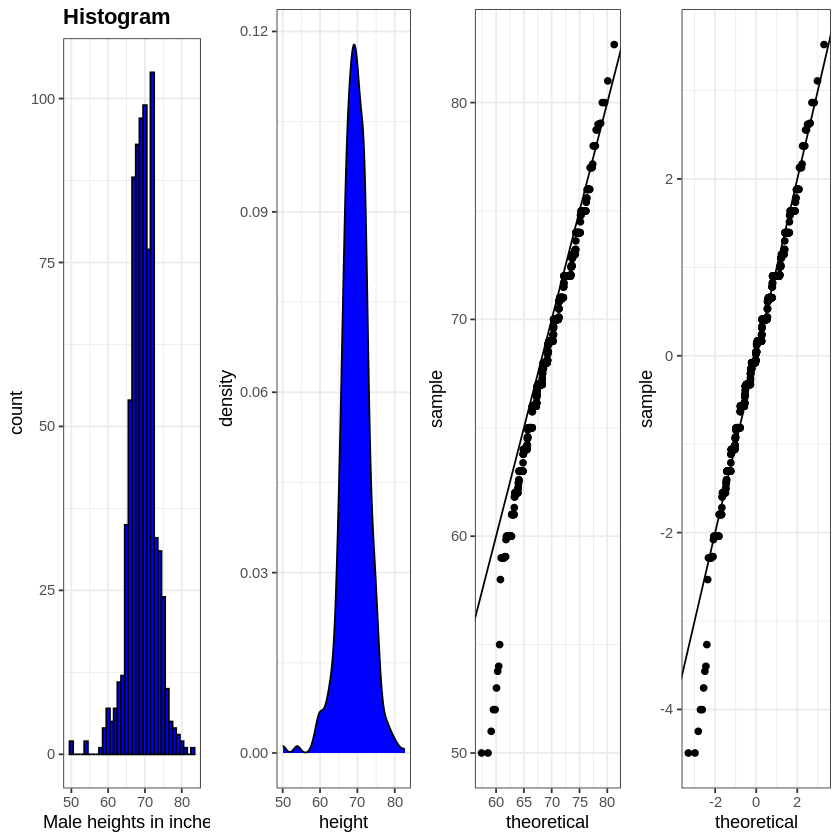

In [25]:
# load heights data
data(heights)

# define p
p <- heights %>%
    filter(sex == "Male") %>%
    ggplot(aes(x = height))

# Histogram plot with blue fill, black outline, labels and title
p1 <- p + geom_histogram(binwidth = 1, fill = "blue", col = "black") +
    xlab("Male heights in inches") +
    ggtitle("Histogram")

# Density plot
p2 <- p + geom_density(fill = "blue")

# QQ-plot against a normal distribution with same mean/sd as data
params <- heights %>%
    filter(sex == "Male") %>%
    summarize(mean = mean(height), sd = sd(height))
p3 <- ggplot(heights, aes(sample = height))
p3 <- p3 + stat_qq(distribution = qnorm, dparams = list(mean = params$mean, sd = params$sd))
p3 <- p3 + geom_abline()

# QQ-plot of scaled data against the standard normal distribution
p4 <- heights %>%
    ggplot(aes(sample = scale(height))) +
    geom_qq() +
    geom_abline()

# arrange plots next to each other in 1 row, 4 columns
library(gridExtra)
grid.arrange(p1, p2, p3, p4, ncol = 4)

It is possible to make two density plots, one for each sex, using:

`heights %>%
  ggplot(aes(height, group = sex)) +
  geom_density()`

We can also assign groups through the color or fill argument. For example, if you type `color = sex` ggplot knows you want a different color for each sex.

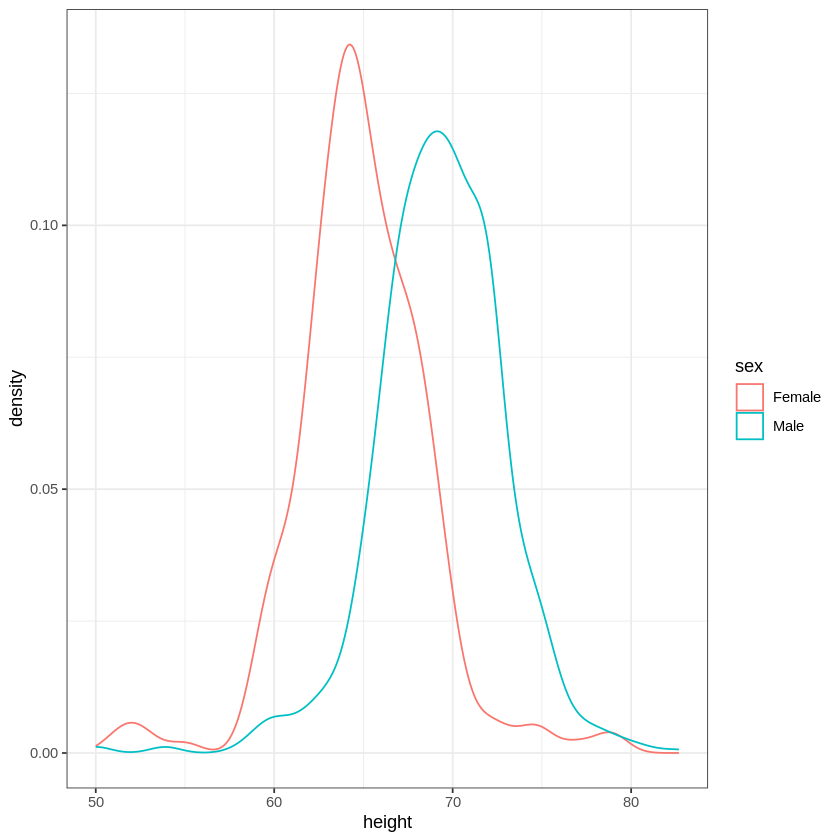

In [26]:
heights %>%
  ggplot(aes(height, color = sex)) +
  geom_density()

# Real Examples

The data used in this section was extracted form https://www.gapminder.org/

A selection of world health and economics statistics from the Gapminder project can be found in the dslabs package as data(gapminder).

In [27]:
# library(dslabs)
data(gapminder)
head(gapminder)

# compare infant mortality in Sri Lanka and Turkey
gapminder %>%
    filter(year == 2015 & country %in% c("Sri Lanka", "Turkey")) %>%
    select(country, infant_mortality)

,country,year,infant_mortality,life_expectancy,fertility,population,gdp,continent,region
,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
1,Albania,1960,115.40,62.87,6.19,1636054,NA,Europe,Southern Europe
2,Algeria,1960,148.20,47.50,7.65,11124892,13828152297,Africa,Northern Africa
3,Angola,1960,208.00,35.98,7.32,5270844,NA,Africa,Middle Africa
4,Antigua and Barbuda,1960,NA,62.97,4.43,54681,NA,Americas,Caribbean
5,Argentina,1960,59.87,65.39,3.11,20619075,108322326649,Americas,South America
6,Armenia,1960,NA,66.86,4.55,1867396,NA,Asia,Western Asia


country,infant_mortality
<fct>,<dbl>
Sri Lanka,8.4
Turkey,11.6



A prevalent worldview is that the world is divided into two groups of countries:
* Western world: high life expectancy, low fertility rate
* Developing world: lower life expectancy, higher fertility rate

A scatterplot of life expectancy versus fertility rate in 1962 suggests that this viewpoint was grounded in reality 50 years ago.

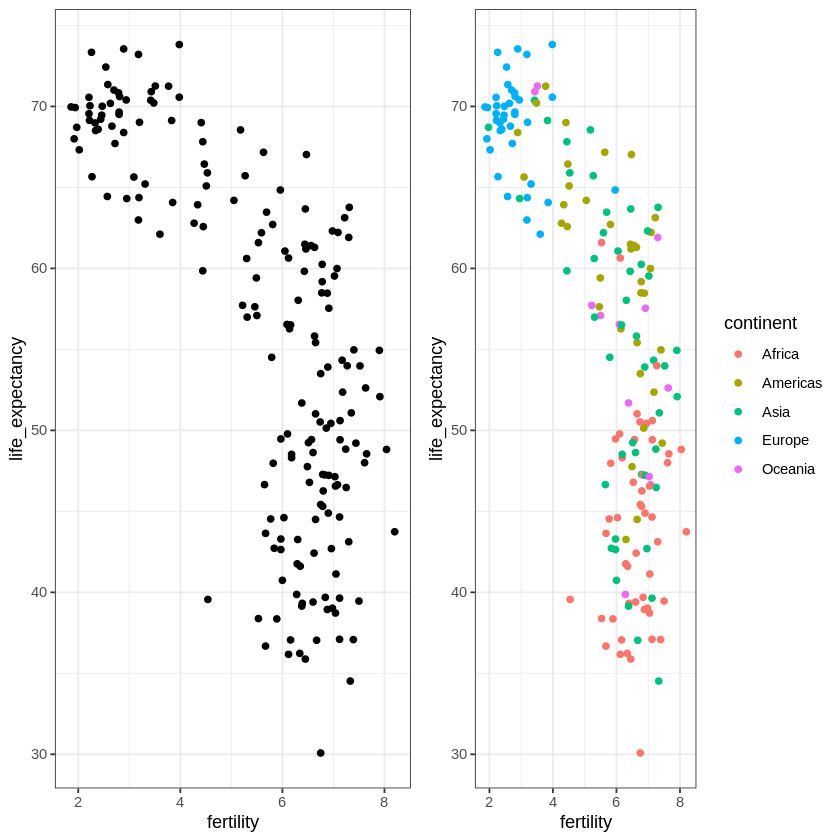

In [28]:
p1 <- filter(gapminder, year == 1962) %>%
    ggplot(aes(fertility, life_expectancy)) +
    geom_point()

# add color as continent
p2 <- filter(gapminder, year == 1962) %>%
    ggplot(aes(fertility, life_expectancy, color = continent)) +
    geom_point()

grid.arrange(p1, p2, ncol = 2)

Faceting makes multiple side-by-side plots stratified by some variable. This is a way to ease comparisons.

The `facet_grid()` function allows faceting by up to two variables, with rows faceted by one variable and columns faceted by the other variable.

The `facet_wrap()` function facets by one variable and automatically wraps the series of plots so they have readable dimensions.

Faceting keeps the axes fixed across all plots, easing comparisons between plots.

The data suggest that the developing versus Western world view no longer makes sense in 2012.


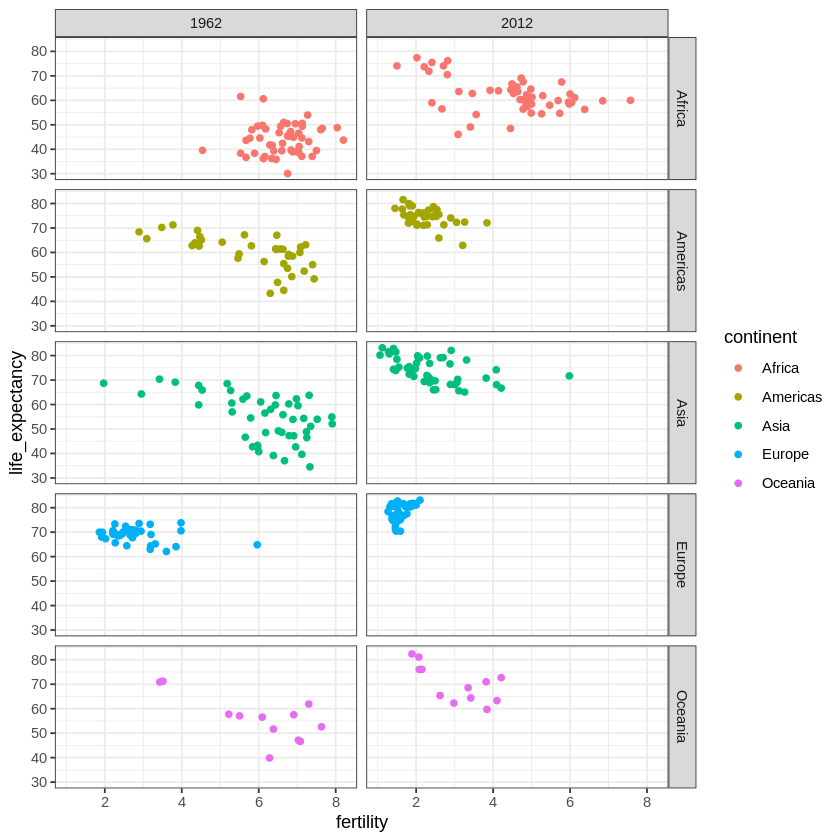

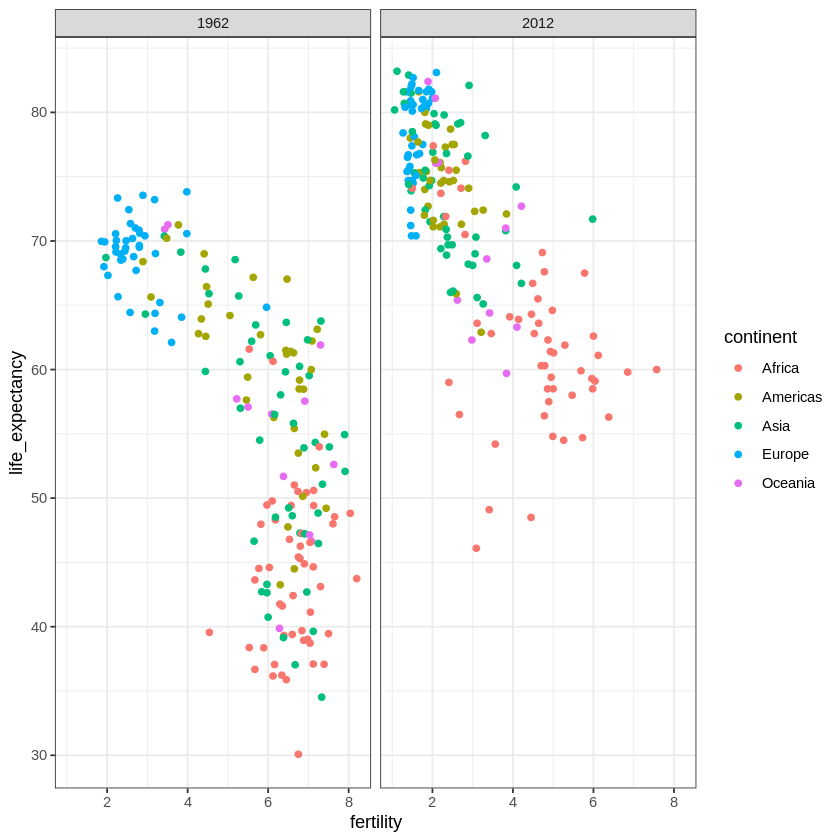

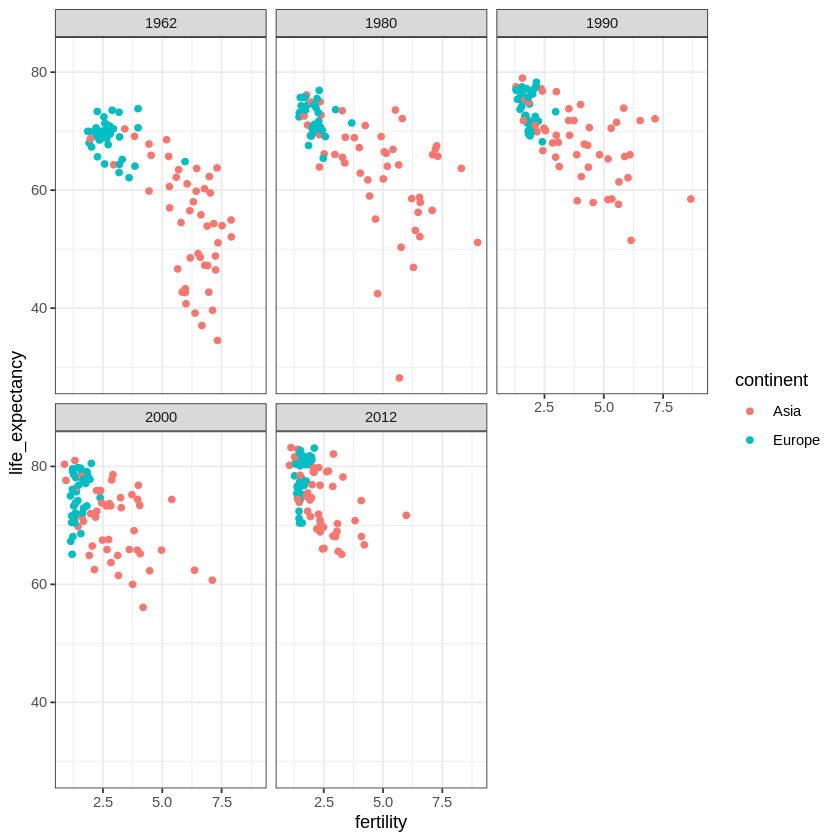

In [29]:
# facet by continent and year
filter(gapminder, year %in% c(1962, 2012)) %>%
    ggplot(aes(fertility, life_expectancy, col = continent)) +
    geom_point() +
    facet_grid(continent ~ year)

# facet by year only
filter(gapminder, year %in% c(1962, 2012)) %>%
    ggplot(aes(fertility, life_expectancy, col = continent)) +
    geom_point() +
    facet_grid(. ~ year)

# facet by year, plots wrapped onto multiple rows
years <- c(1962, 1980, 1990, 2000, 2012)
continents <- c("Europe", "Asia")
gapminder %>%
    filter(year %in% years & continent %in% continents) %>%
    ggplot(aes(fertility, life_expectancy, col = continent)) +
    geom_point() +
    facet_wrap(~year)

# Time series plots
    
The `geom_line()` geometry connects adjacent data points to form a continuous line. A line plot is appropriate when points are regularly spaced, densely packed and from a single data series.

It's possible to plot multiple lines on the same graph, and it's useful to group or color by a variable so that the lines are plotted independently.

Labeling is usually preferred over legends. However, legends are easier to make and appear by default. We'll try adding a label with `geom_text()`, specifying the coordinates where the label should appear on the graph.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_line()`).”


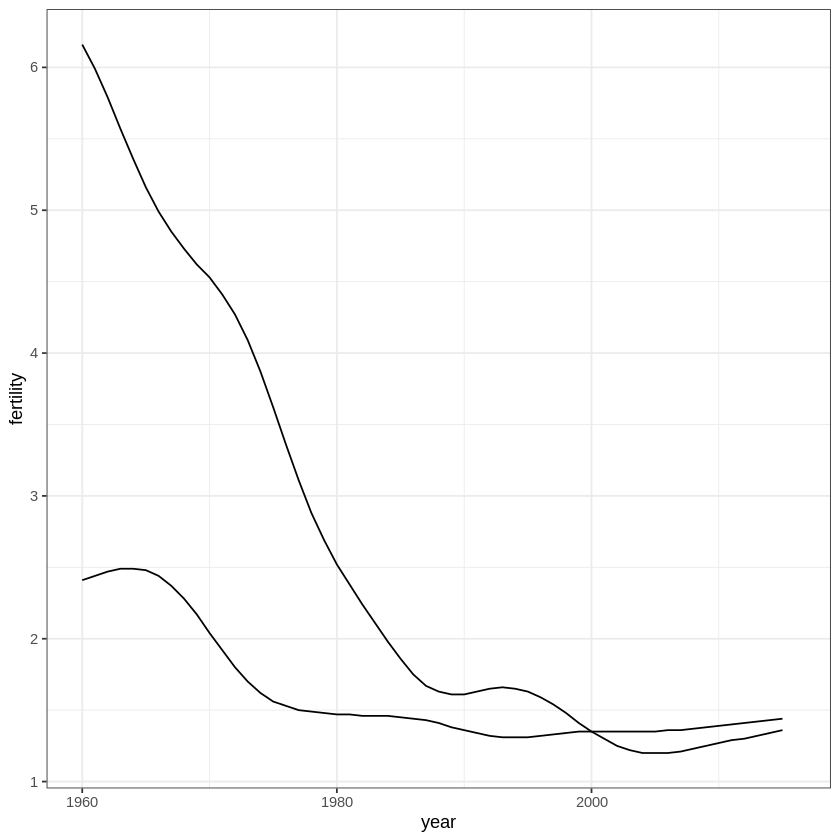

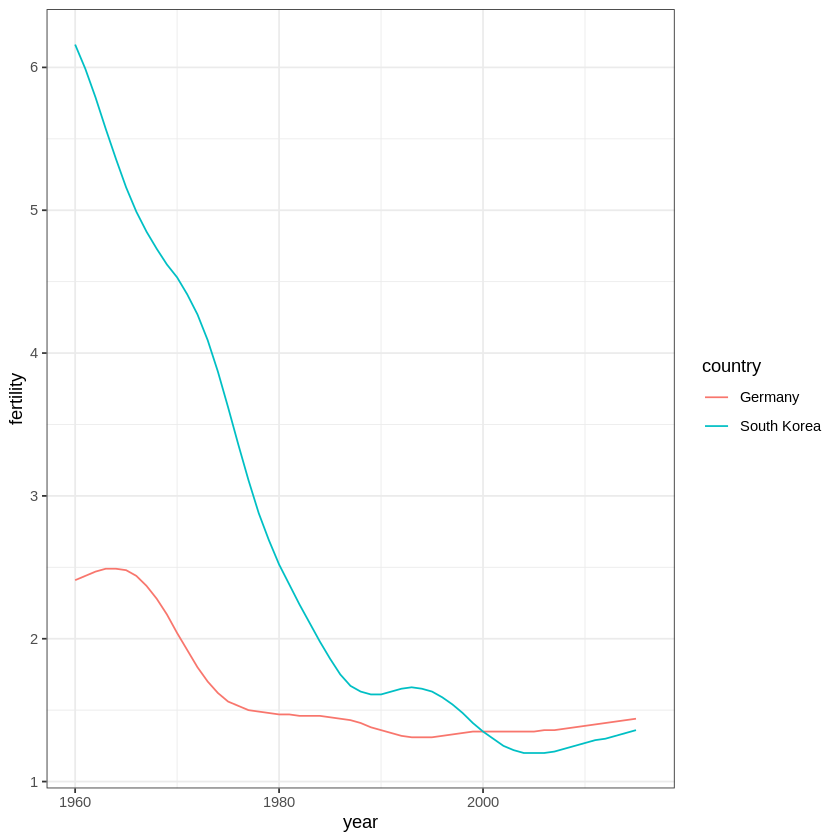

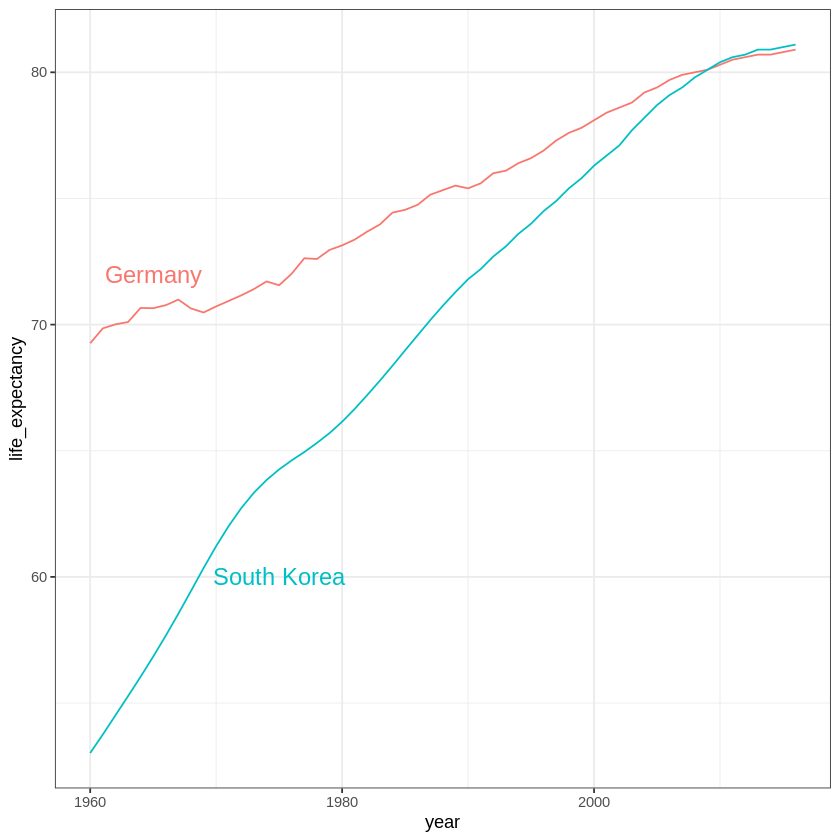

In [30]:
countries <- c("South Korea", "Germany")

# line plot fertility time series for two countries
gapminder %>% filter(country %in% countries) %>%
    ggplot(aes(year, fertility, group = country)) +
    geom_line()

# fertility time series for two countries - lines colored by country
gapminder %>% filter(country %in% countries) %>%
    ggplot(aes(year, fertility, col = country)) +
    geom_line()

# life expectancy time series - lines colored by country and labeled, no legend
labels <- data.frame(country = countries, x = c(1975, 1965), y = c(60, 72))
# x & y define the position of the lables for each country
gapminder %>% filter(country %in% countries) %>%
    ggplot(aes(year, life_expectancy, col = country)) +
    geom_line() +
    geom_text(data = labels, aes(x, y, label = country), size = 5) +
    theme(legend.position = "none")

We use GDP data to compute income in US dollars per day, adjusted for inflation.
    
Common transformations are the log base 2 transformation and the log base 10 transformation, but the choice of base depends on the range of the data.

The mode of a distribution is the value with the highest frequency, the mode of a normal distribution is the average, but then a distribution can have multiple local modes.

There are two ways to use log transformations in plots: transform the data before plotting or transform the axes of the plot. Log scales have the advantage of showing the original values as axis labels, while log transformed values ease interpretation of intermediate values between labels.

We're going to scale the x-axis using `scale_x_continuous()` or `scale_x_log10()` layers in ggplot2. Notice that a similar functions exist for the y-axis.

In the pot we see that in 1970, income distribution is bimodal, consistent with the dichotomous Western versus developing worldview.


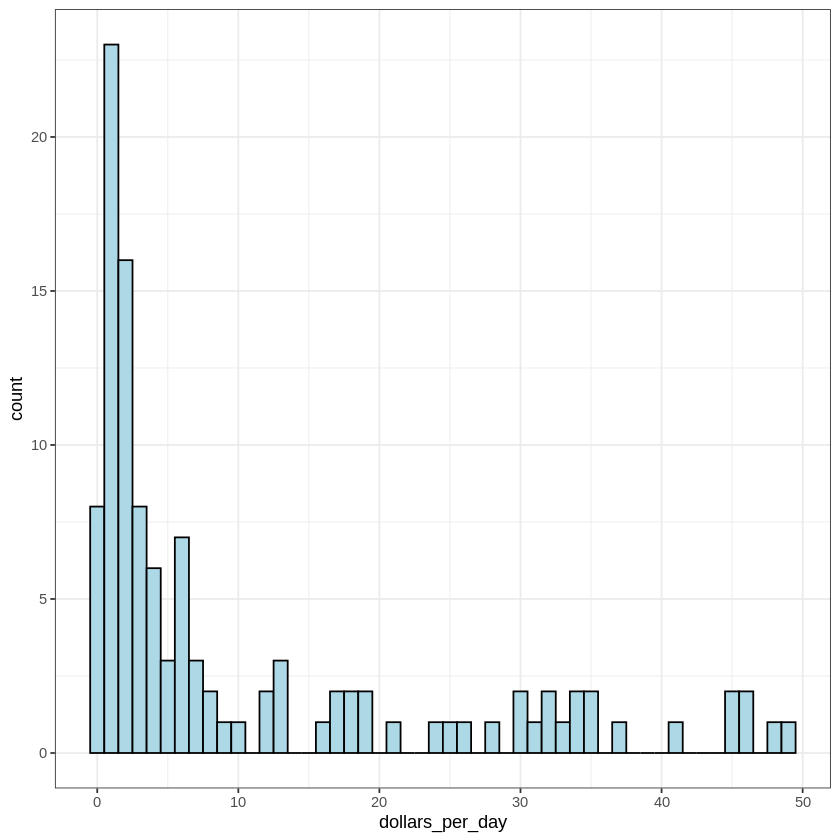

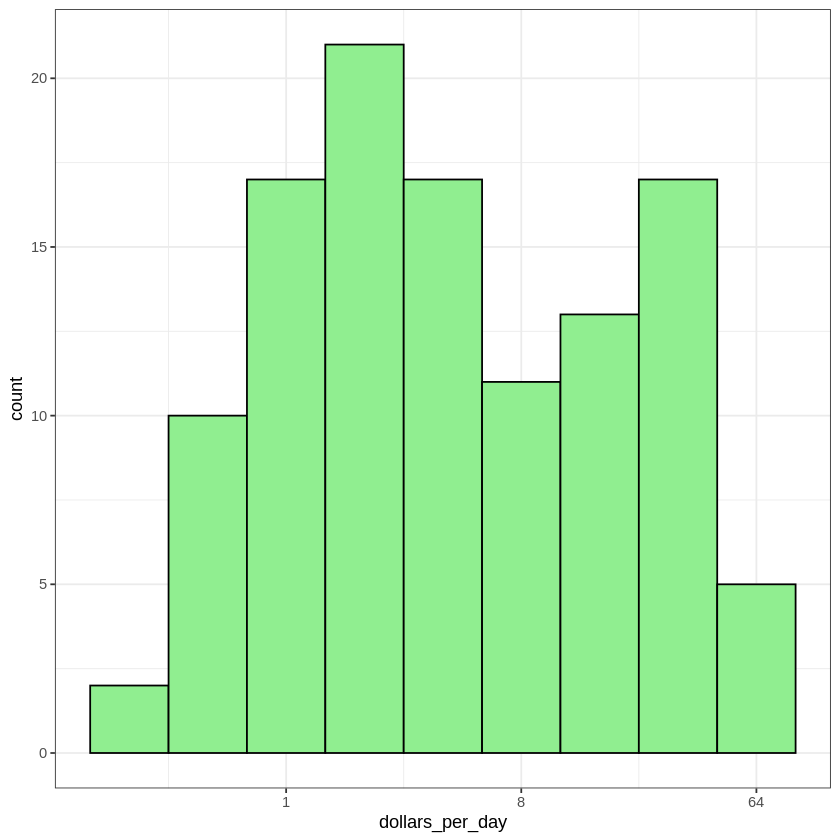

In [31]:
# add dollars per day variable by dividing gdp per population, and dividing by days of a year
gapminder <- gapminder %>%
    mutate(dollars_per_day = gdp/population/365)

# histogram of dollars per day
past_year <- 1970
gapminder %>%
    filter(year == past_year & !is.na(gdp)) %>%
    ggplot(aes(dollars_per_day)) +
    geom_histogram(binwidth = 1, color = "black", fill="light blue")

# repeat histogram with log2 scaled x-axis
gapminder %>%
    filter(year == past_year & !is.na(gdp)) %>%
    ggplot(aes(dollars_per_day)) +
    geom_histogram(binwidth = 1, color = "black", fill="light green") +
    scale_x_continuous(trans = "log2")

We're going to make boxplots stratified by a categorical variable using the `geom_boxplot()` geometry.

We'll also rotate axis labels by changing the theme through `element_text()`. The angle and justification of the text labels can be changed too.

We'll consider ordering the factors by a meaningful value with the `reorder()` function, which changes the order of factor levels based on a related numeric vector. This is a way to ease comparisons.


[1] 22

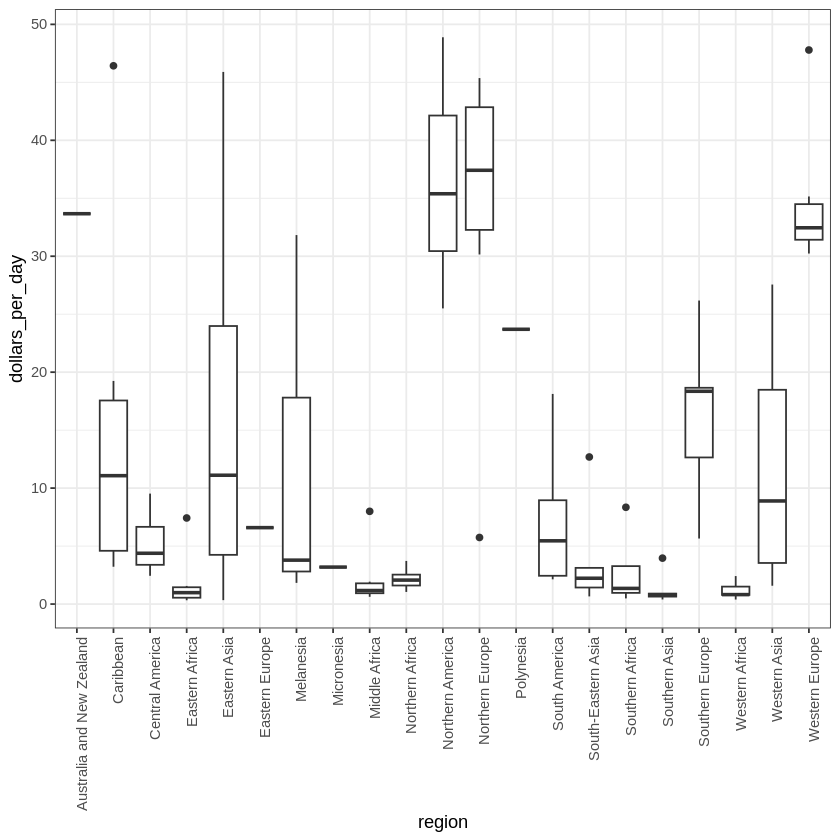

In [32]:
# number of regions
length(levels(gapminder$region))

# boxplot of GDP by region in 1970 and rotate names on x-axis
past_year <- 1970
p <- gapminder %>%
    filter(year == past_year & !is.na(gdp)) %>%
    ggplot(aes(region, dollars_per_day))
p + geom_boxplot() +
    theme(axis.text.x = element_text(angle = 90, hjust = 1))

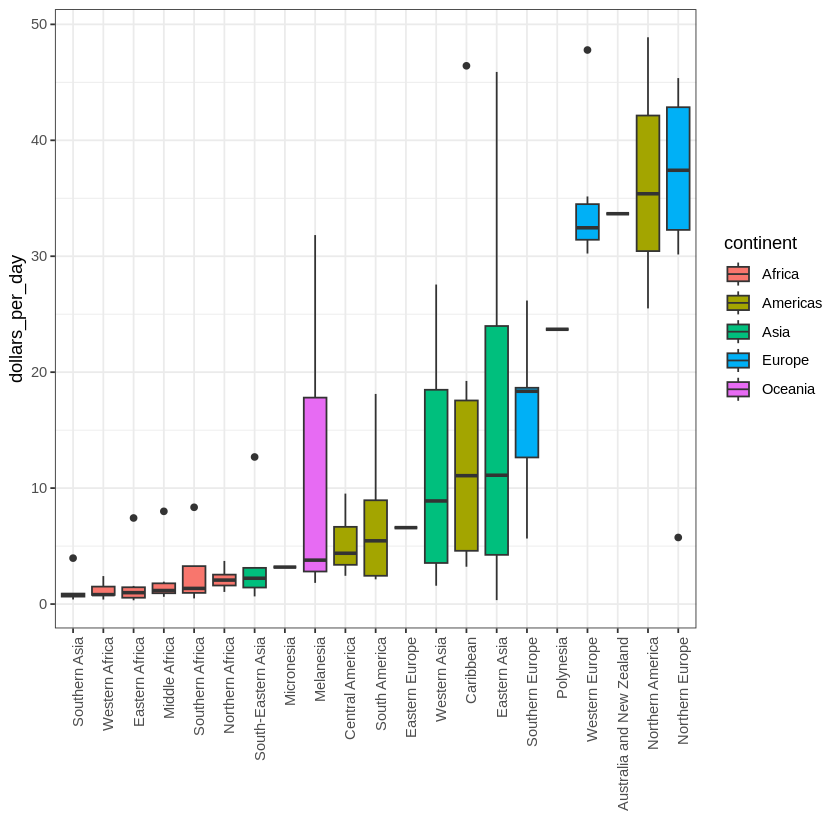

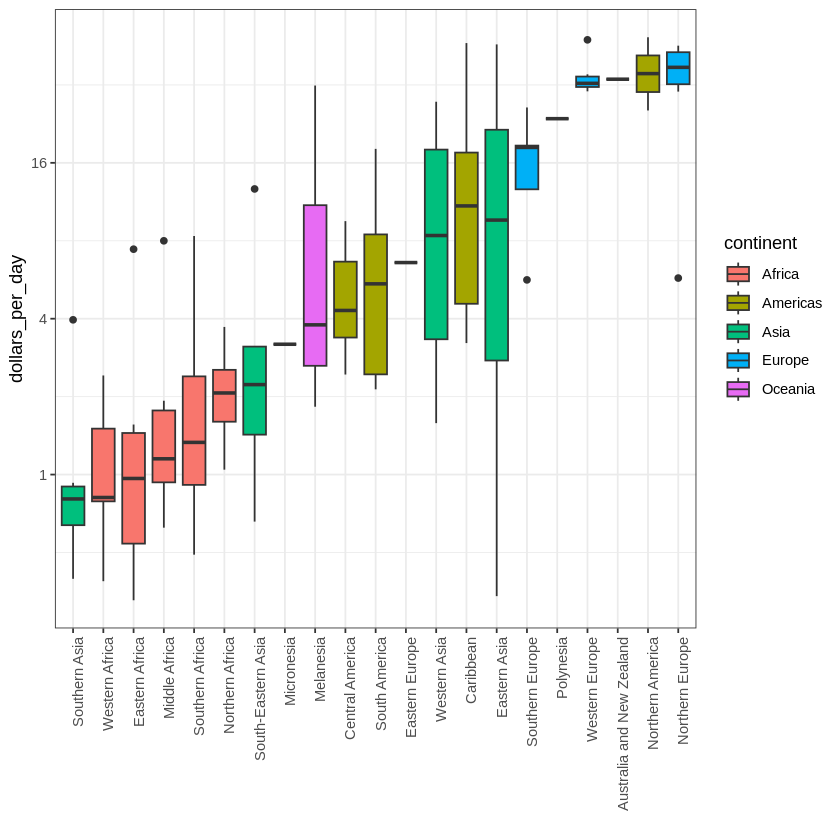

In [33]:
# reorder by median income and color by continent
p <- gapminder %>%
    filter(year == past_year & !is.na(gdp)) %>%
    mutate(region = reorder(region, dollars_per_day, FUN = median)) %>%    # reorder
    ggplot(aes(region, dollars_per_day, fill = continent)) +    # color by continent
    geom_boxplot() +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
    xlab("")
p

# log2 scale y-axis
p + scale_y_continuous(trans = "log2")

We use `intersect()` to find the overlap between two vectors.

To make boxplots where grouped variables are adjacaent, we color the boxplot by a factor instead of faceting by that factor. This is a way to ease comparisons.

The data suggest that the income gap between rich and poor countries has narrowed.


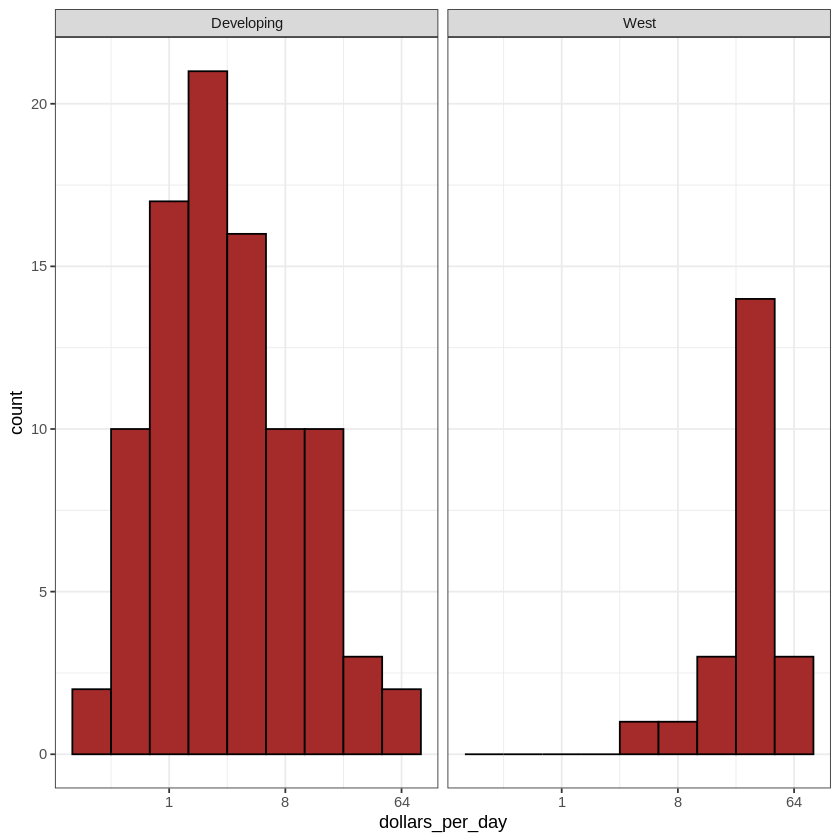

In [34]:
# add dollars per day variable and define past year
gapminder <- gapminder %>%
    mutate(dollars_per_day = gdp/population/365)
past_year <- 1970

# define Western countries
west <- c("Western Europe", "Northern Europe", "Southern Europe", "Northern America", "Australia and New Zealand")

# facet by West vs devloping
gapminder %>%
    filter(year == past_year & !is.na(gdp)) %>%
    mutate(group = ifelse(region %in% west, "West", "Developing")) %>%
    ggplot(aes(dollars_per_day)) +
    geom_histogram(binwidth = 1, color = "black", fill="brown") +
    scale_x_continuous(trans = "log2") +
    facet_grid(. ~ group) #Only searate by group

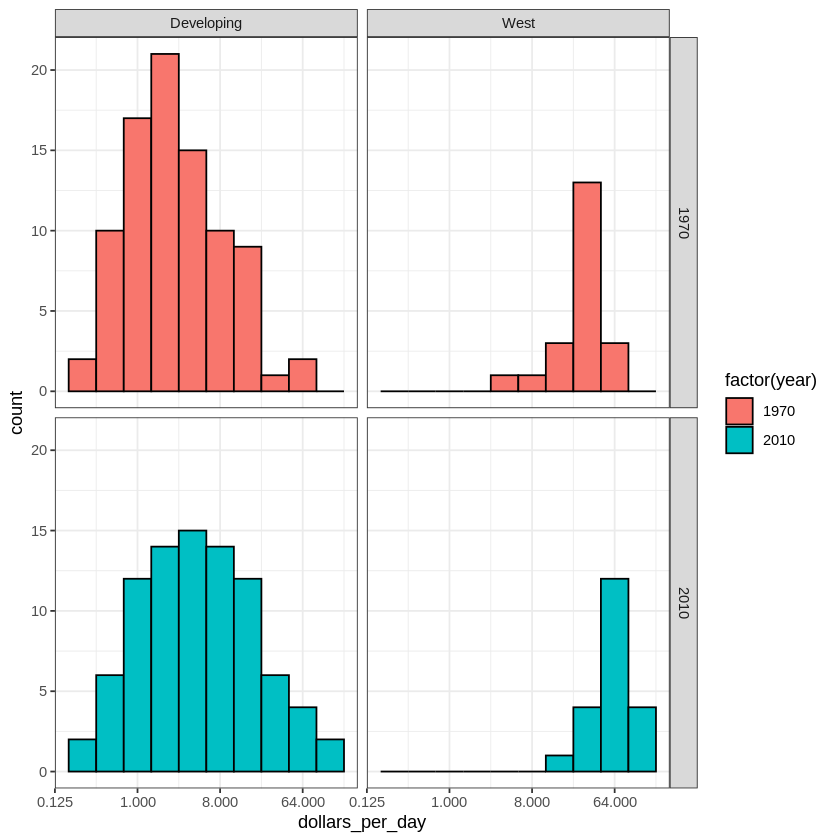

In [35]:
# define countries that have data available in both years
present_year <- 2010
country_list_1 <- gapminder %>%
    filter(year == past_year & !is.na(dollars_per_day)) %>% .$country
country_list_2 <- gapminder %>%
    filter(year == present_year & !is.na(dollars_per_day)) %>% .$country
country_list <- intersect(country_list_1, country_list_2)

# make histogram including only countries with data available in both years
gapminder %>%
    filter(year %in% c(past_year, present_year) & country %in% country_list) %>%    # keep only selected countries
    mutate(group = ifelse(region %in% west, "West", "Developing")) %>%
    ggplot(aes(dollars_per_day, fill=factor(year))) +
    geom_histogram(binwidth = 1, color = "black") +
    scale_x_continuous(trans = "log2") +
    facet_grid(year ~ group)

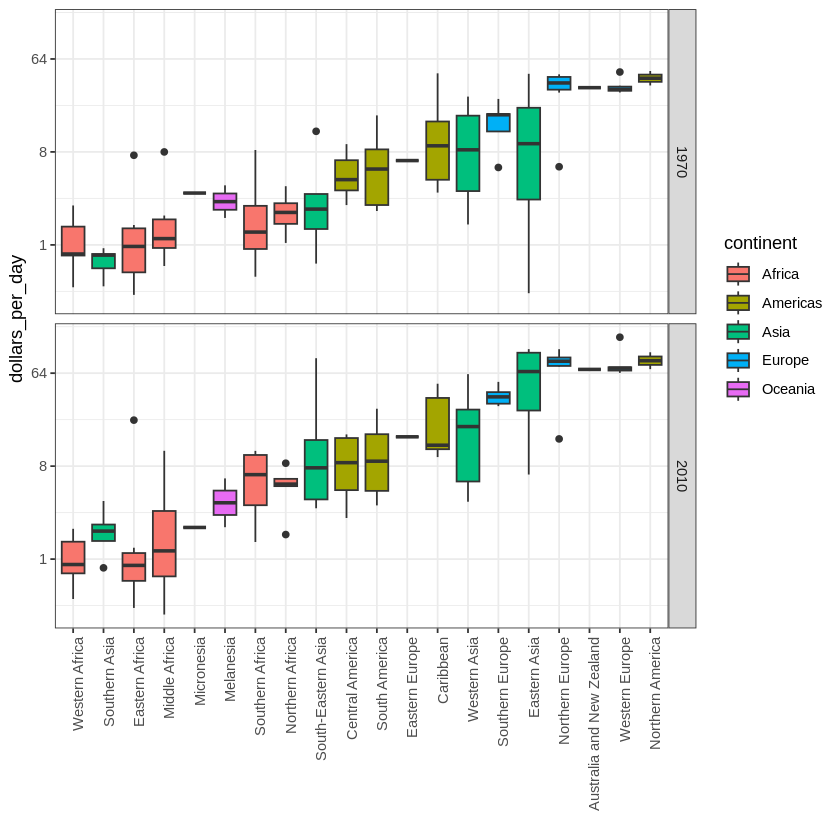

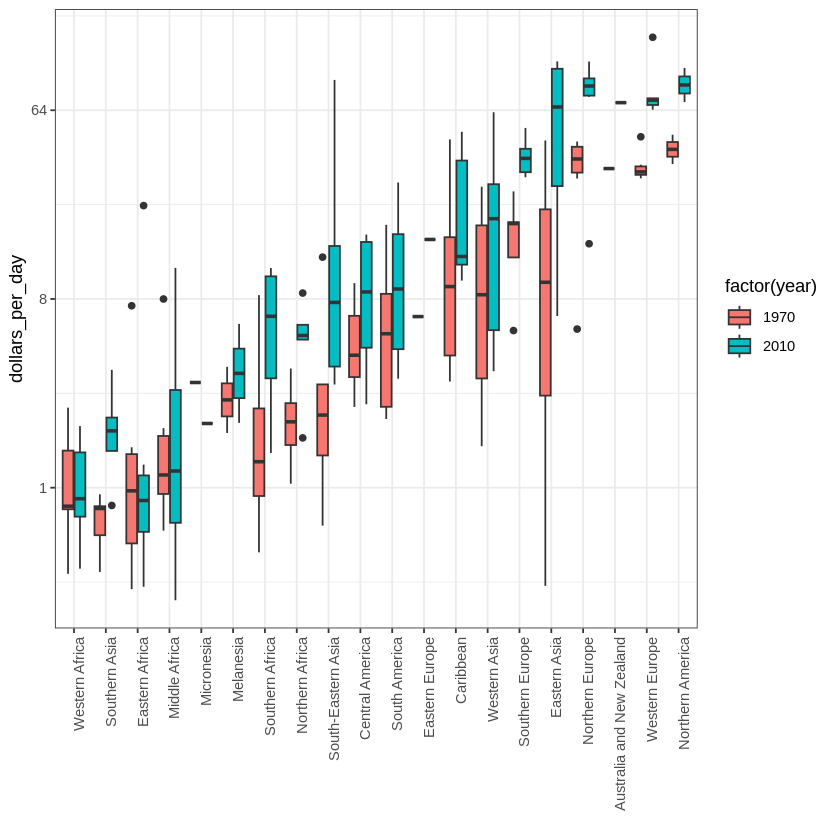

In [36]:
# boxplots of 1970 & 2010
p <- gapminder %>%
    filter(year %in% c(past_year, present_year) & country %in% country_list) %>%
    mutate(region = reorder(region, dollars_per_day, FUN = median)) %>%
    ggplot() +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
    xlab("") + scale_y_continuous(trans = "log2")

 p + geom_boxplot(aes(region, dollars_per_day, fill = continent)) +
     facet_grid(year ~ .)

 # arrange matching boxplots next to each other, colored by year
 p + geom_boxplot(aes(region, dollars_per_day, fill = factor(year)))

We change the y-axis of density plots to variable counts using `..count..` as the $y$ argument.

The `kable()` function in *knitr* is a very simple table generator, and is simple by design. It only generates tables for strictly rectangular data such as matrices and data frames.

The `case_when()` function defines a factor whose levels are defined by a variety of logical operations to group data.

Plot stacked density plots using `position="stack"`.

We define a *weight aesthetic mapping* to change the relative weights of density plots - for example, this allows weighting of plots by population rather than number of countries.



|group      |  n|
|:----------|--:|
|Developing | 87|
|West       | 21|

Warning message:
“The dot-dot notation (`..count..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(count)` instead.”


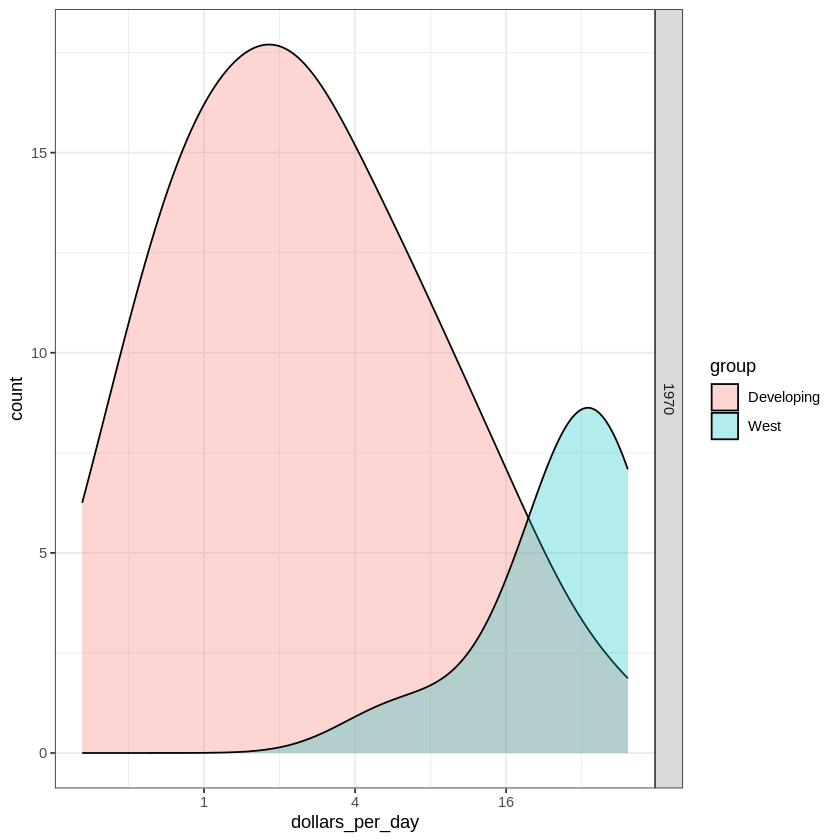

In [37]:
# smooth density plots - area under each curve adds to 1
gapminder %>%
    filter(year == past_year & country %in% country_list) %>%
    mutate(group = ifelse(region %in% west, "West", "Developing")) %>% group_by(group) %>%
    summarize(n = n()) %>% knitr::kable()

# smooth density plots - variable counts on y-axis
p <- gapminder %>%
    filter(year == past_year & country %in% country_list) %>%
    mutate(group = ifelse(region %in% west, "West", "Developing")) %>%
    ggplot(aes(dollars_per_day, y = ..count.., fill = group)) +
    scale_x_continuous(trans = "log2")
p + geom_density(alpha = 0.3, bw = 0.75) + facet_grid(year ~ .) # alpha = transparecy, bw = smoothness

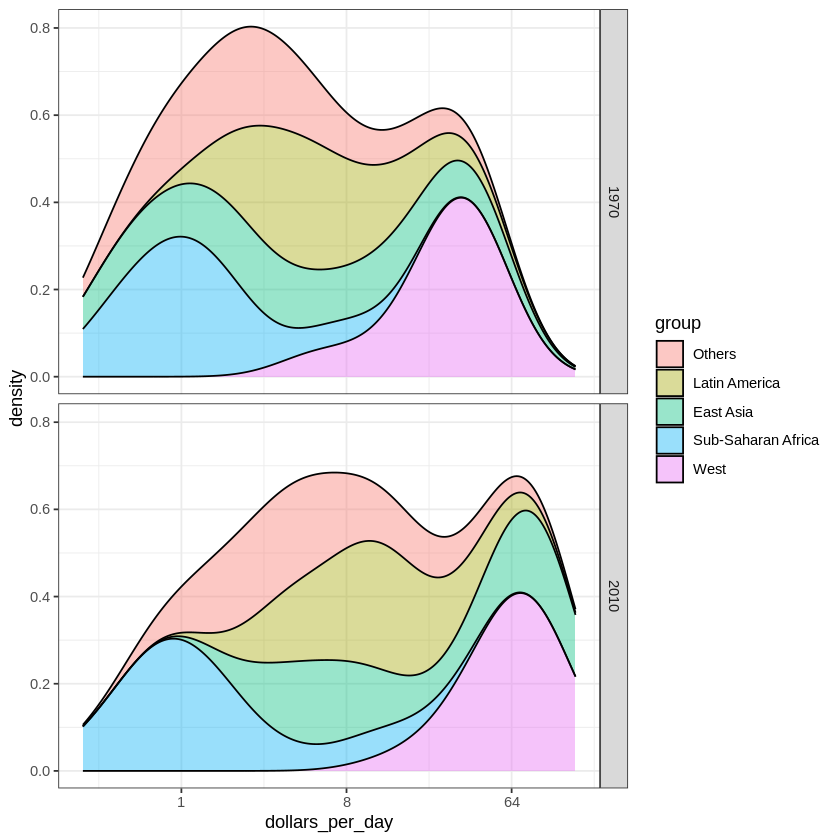

In [38]:
# add group as a factor, grouping regions
gapminder <- gapminder %>%
    mutate(group = case_when(
            .$region %in% west ~ "West",
            .$region %in% c("Eastern Asia", "South-Eastern Asia") ~ "East Asia",
            .$region %in% c("Caribbean", "Central America", "South America") ~ "Latin America",
            .$continent == "Africa" & .$region != "Northern Africa" ~ "Sub-Saharan Africa",
            TRUE ~ "Others"))

# reorder factor levels
gapminder2 <- gapminder %>%
    mutate(group = factor(group, levels = c("Others", "Latin America", "East Asia", "Sub-Saharan Africa", "West")))

# note you must redefine p with the new gapminder object first
p <- gapminder2 %>%
  filter(year %in% c(past_year, present_year) & country %in% country_list) %>%
    ggplot(aes(dollars_per_day, fill = group)) +
    scale_x_continuous(trans = "log2")

# stacked density plot
p + geom_density(alpha = 0.4, bw = 0.75, position = "stack") +
    facet_grid(year ~ .)

We should take into account that not all countries have the same population

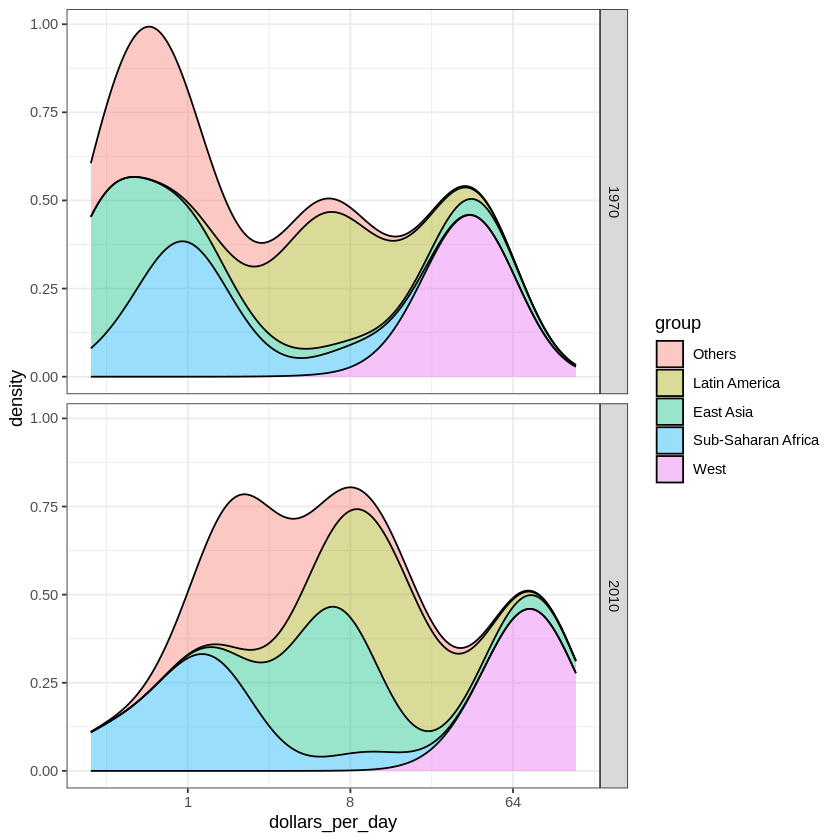

In [39]:
# weighted stacked density plot
gapminder2 %>%
    filter(year %in% c(past_year, present_year) & country %in% country_list) %>%
    group_by(year) %>%
    mutate(weight = population/sum(population*2)) %>%
    ungroup() %>%
    ggplot(aes(dollars_per_day, fill = group, weight = weight)) +
    scale_x_continuous(trans = "log2") +
    geom_density(alpha = 0.4, bw = 0.75, position = "stack") + facet_grid(year ~ .)

# Ecological fallacy

The ecological fallacy is assuming that conclusions made from the average of a group apply to all members of that group.

The `breaks` argument allows us to set the location of the axis labels and tick marks.

The logistic or logit transformation is defined as $f(P)=log(\frac{P}{1-P})$
, or the log of odds. This scale is useful for highlighting differences near $0$ or near $1$ and converts fold changes into constant increases.

In [40]:
# define gapminder
data(gapminder)

# add additional cases
gapminder <- gapminder %>%
    mutate(group = case_when(
        .$region %in% west ~ "The West",
        .$region %in% "Northern Africa" ~ "Northern Africa",
        .$region %in% c("Eastern Asia", "South-Eastern Asia") ~ "East Asia",
        .$region == "Southern Asia" ~ "Southern Asia",
        .$region %in% c("Central America", "South America", "Caribbean") ~ "Latin America",
        .$continent == "Africa" & .$region != "Northern Africa" ~ "Sub-Saharan Africa",
        .$region %in% c("Melanesia", "Micronesia", "Polynesia") ~ "Pacific Islands"))

# define a data frame with group average income and average infant survival rate
surv_income <- gapminder %>%
    filter(year %in% present_year & !is.na(gdp) & !is.na(infant_mortality) & !is.na(group)) %>%
    group_by(group) %>%
    summarize(income = sum(gdp)/sum(population)/365,
                        infant_survival_rate = 1 - sum(infant_mortality/1000*population)/sum(population))
surv_income %>% arrange(income)

group,income,infant_survival_rate
<chr>,<dbl>,<dbl>
Sub-Saharan Africa,1.759299,0.9358607
Southern Asia,2.070296,0.9521295
Pacific Islands,2.704745,0.9560088
Northern Africa,4.942935,0.9703514
Latin America,13.244228,0.9831732
East Asia,13.439078,0.9848303
The West,77.065524,0.9951445


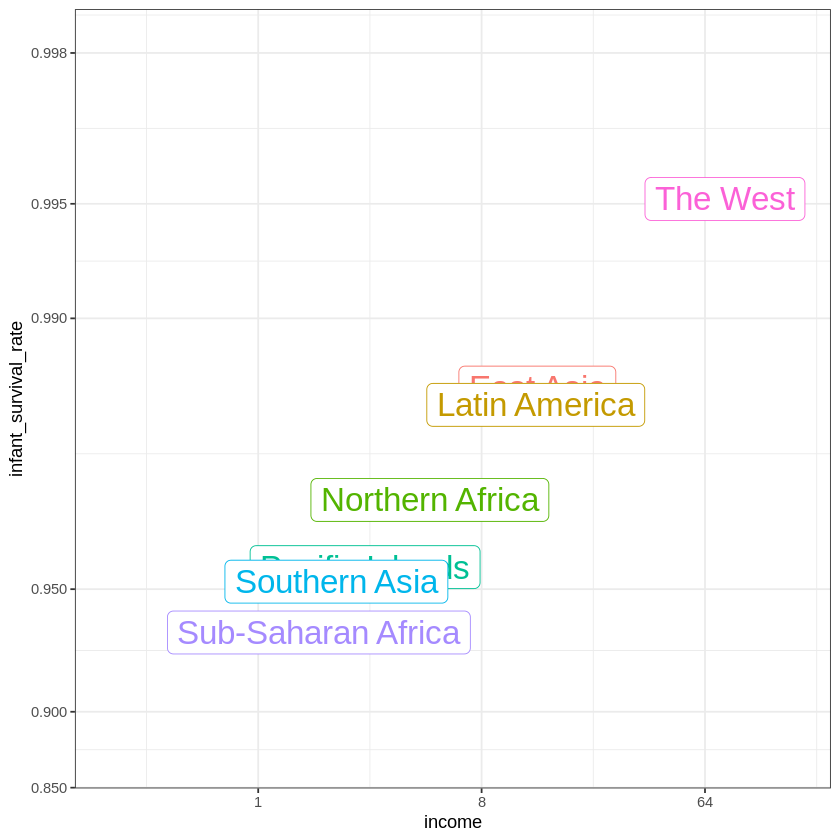

In [41]:
# plot infant survival versus income, with transformed axes
surv_income %>% ggplot(aes(income, infant_survival_rate, label = group, color = group)) +
    scale_x_continuous(trans = "log2", limit = c(0.25, 150)) +
    scale_y_continuous(trans = "logit", limit = c(0.875, .9981),
                                       breaks = c(.85, .90, .95, .99, .995, .998)) +
    geom_label(size = 7, show.legend = FALSE)

# Examples

Many datasets have missing data. In R, some functions will return NA if there's any NA number in the dataset.

To ignore the NAs, we can use: `!is.na(Data)` or
`mean(Data, na.rm=TRUE)`

For these examples, we're going to use the data from the package *NHANES*

In [42]:
data(NHANES)
# data set consisting of females between 20 and 29 years
tab <- NHANES %>% filter(Gender == "female" & AgeDecade==" 20-29")

In [43]:
# calculate average and standar deviation of systolic blood pressure, which are stored in the BPSysAve variable in the NHANES dataset.
ref <- NHANES %>% filter(AgeDecade == " 20-29" & Gender == "female") %>%
  summarize(average = mean(BPSysAve, na.rm=TRUE), standard_devition = sd(BPSysAve, na.rm=TRUE))
ref

average,standard_devition
<dbl>,<dbl>
108.4224,10.14668


To print just the result we use `%>% .$variable`

In [44]:
# print only the number
ref_avg <- NHANES %>%
  filter(AgeDecade == " 20-29" & Gender == "female") %>%
  summarize(average = mean(BPSysAve, na.rm = TRUE)) %>% .$average
ref_avg

[1] 108.4224

In [45]:
# getting the min and max values of systolic blood presure
NHANES %>%
      filter(AgeDecade == " 20-29"  & Gender == "female") %>% summarize(minbp = min(BPSysAve, na.rm=TRUE), maxbp=max(BPSysAve, na.rm=TRUE))

minbp,maxbp
<int>,<int>
84,179


In [46]:
# grouping by ages and calculating the average and standard deviation of each group
NHANES %>%
      filter(Gender == "female") %>%
      group_by(AgeDecade) %>%
      summarize(average=mean(BPSysAve, na.rm=TRUE), standard_deviation=sd(BPSysAve, na.rm=TRUE))

AgeDecade,average,standard_deviation
<fct>,<dbl>,<dbl>
0-9,99.95041,9.071798
10-19,104.27466,9.461431
20-29,108.42243,10.146681
30-39,111.25512,12.314790
40-49,115.49385,14.530054
50-59,121.84245,16.179333
60-69,127.17787,17.125713
70+,133.51652,19.841781
NA,141.54839,22.908521


In [47]:
# we can create a single summary table for the average and standard deviation of systolic blood pressure using group_by(AgeDecade, Gender).
# we no longer have to filter
NHANES %>%
  group_by(AgeDecade, Gender) %>%
  summarize(average=mean(BPSysAve, na.rm=TRUE), standard_deviation=sd(BPSysAve, na.rm=TRUE))

`summarise()` has grouped output by 'AgeDecade'. You can override using the
`.groups` argument.


AgeDecade,Gender,average,standard_deviation
<fct>,<fct>,<dbl>,<dbl>
0-9,female,99.95041,9.071798
0-9,male,97.41912,8.317367
10-19,female,104.27466,9.461431
10-19,male,109.59789,11.227769
20-29,female,108.42243,10.146681
20-29,male,117.85084,11.274795
30-39,female,111.25512,12.314790
30-39,male,119.40063,12.306656
40-49,female,115.49385,14.530054


# More Examples

This time we'll be using the Gapminder dataset in order to see the fertility vs life expectancy of Africa in 2012

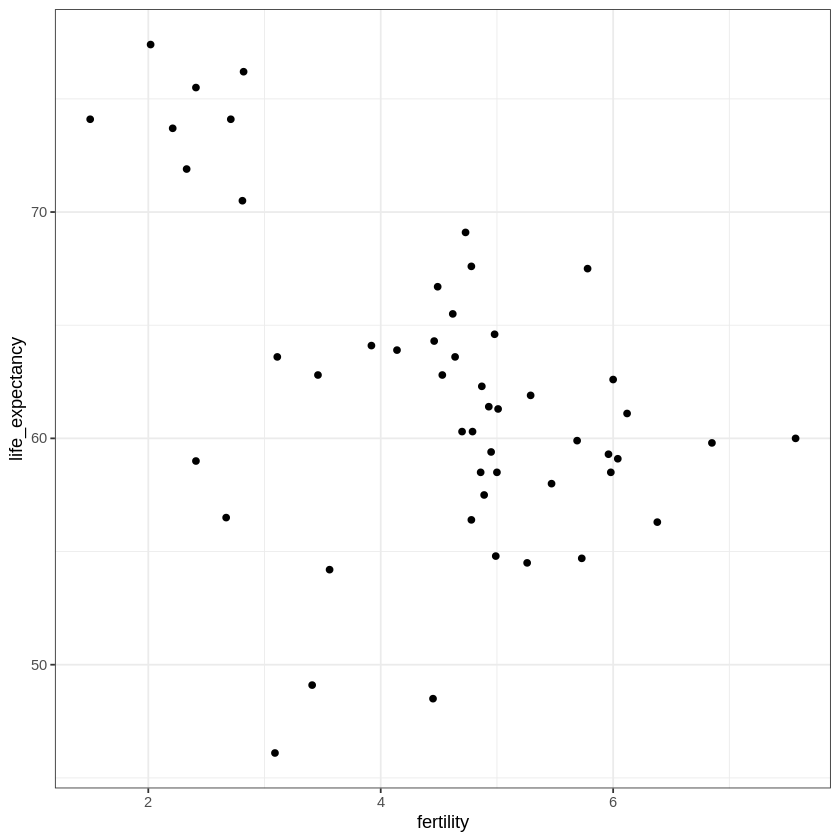

In [48]:
data(gapminder)
# filter by continent = Affrica and year = 2012
gapminder %>% filter(continent == "Africa" & year == "2012") %>%
  ggplot(aes(fertility, life_expectancy )) +
  geom_point()

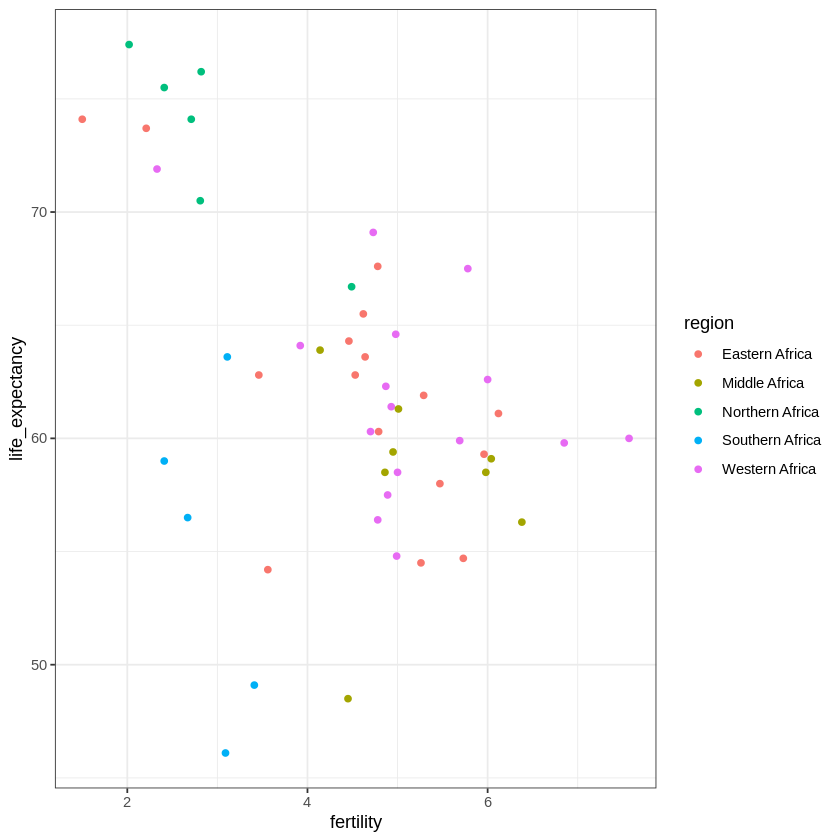

In [49]:
# color by region
gapminder %>%
    filter(continent == "Africa", year == "2012") %>%
    ggplot(aes(fertility, life_expectancy, color=region)) +
    geom_point()

We'll create a dataframe of the countries in Africa that has fertility rate at most 3 and life expectancy at least 70

In [50]:
# filter and create datafreame
filter <- gapminder %>%
    filter(continent == "Africa" & year == "2012" & fertility <= 3 & life_expectancy >= 70) %>%
    select(country,region)

df <- data.frame(filter)
df

country,region
<fct>,<fct>
Algeria,Northern Africa
Cape Verde,Western Africa
Egypt,Northern Africa
Libya,Northern Africa
Mauritius,Eastern Africa
Morocco,Northern Africa
Seychelles,Eastern Africa
Tunisia,Northern Africa


Now we'll create a variable named *dollars_per_day* for African countries in 2010 using GDP data, where the varable repesents the ammount of dollars each african person earns per day as an estimate. Then we'll plot a density plot of this variable.

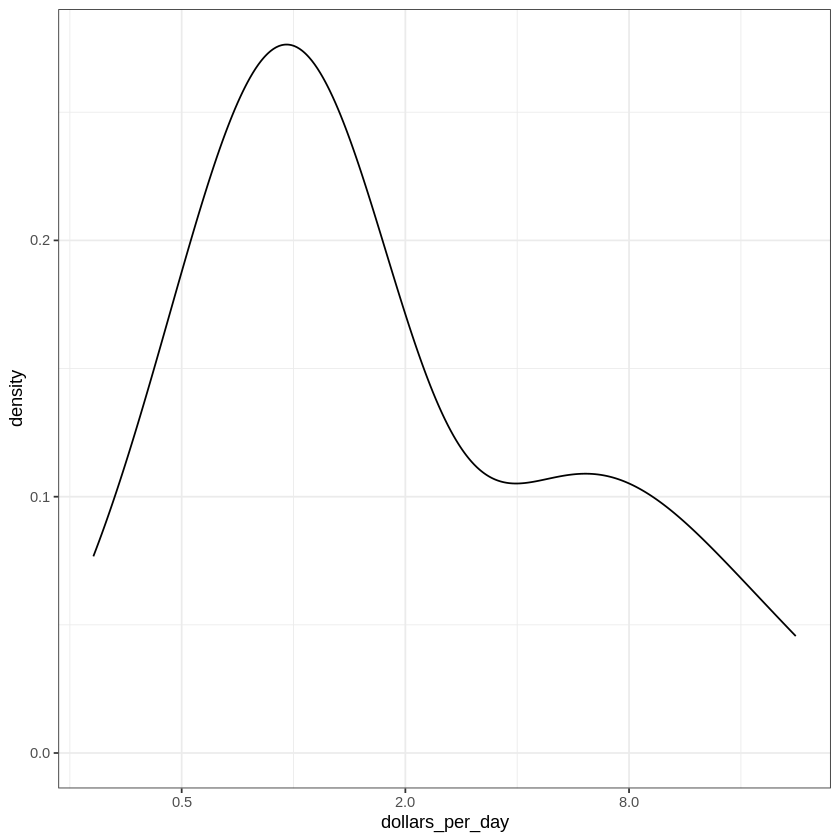

In [51]:
# calculate and plot dollars per day
daydollars <- gapminder %>%
    filter(continent == "Africa" & year == "2010" & !is.na(gdp)) %>%
    mutate(dollars_per_day = gdp/population/365)

# density plot of dollars per day
ggplot(daydollars, aes(dollars_per_day)) +
    scale_x_continuous(trans = "log2") +
    geom_density()

Now we'll plot density plots of *dollars_per_day* of each african region in 1970 and 2010

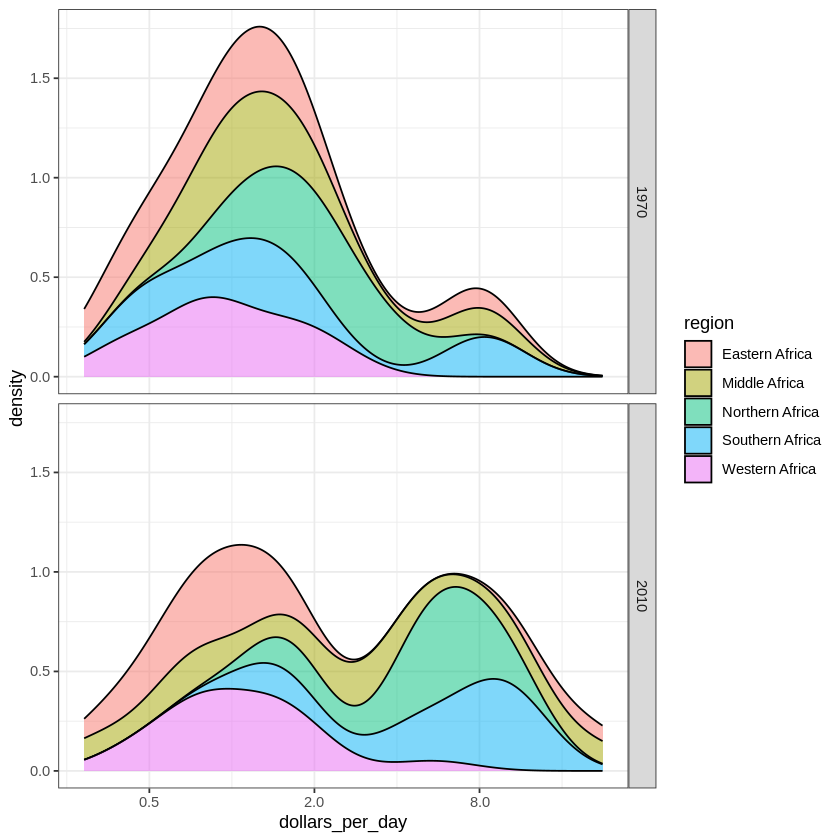

In [53]:
# density plot of each african region
gapminder %>%
    filter(continent == "Africa", year %in% c(1970,2010), !is.na(gdp)) %>%
    group_by(year) %>%
    mutate(dollars_per_day = gdp/population/365) %>%
    ggplot(aes(dollars_per_day, fill=region)) +
    scale_x_continuous(trans = "log2") +
    geom_density(alpha = 0.5, bw=0.5, position = "stack") +
    facet_grid(year ~.)

Finally, we'll show a scatter plot of infant mortality vs dollar_per_day in african countries

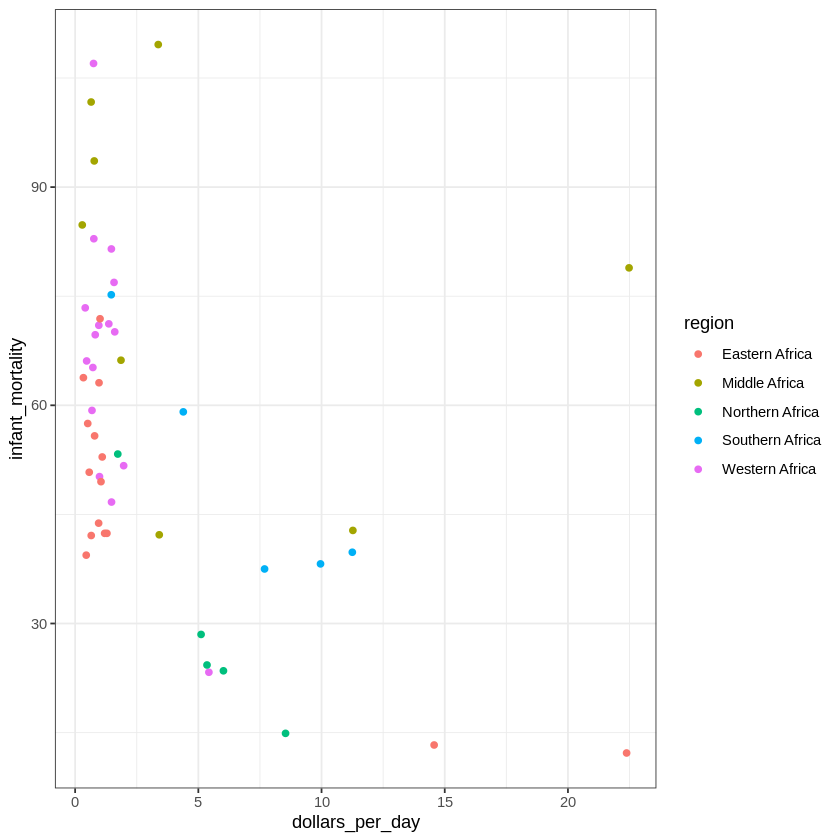

In [54]:
# scatter plot of infant mortality vs dollars_per_day
gapminder_Africa_2010 <- gapminder %>%
    filter(continent == "Africa", year == 2010, !is.na(gdp)) %>%
    mutate(dollars_per_day = gdp/population/365)

ggplot(gapminder_Africa_2010, aes(dollars_per_day, infant_mortality, color=region)) +
    geom_point()

Let's add some lables to the plot so that we can compare the evolution. We'll aslo split the plot between years 1970 and 2010.

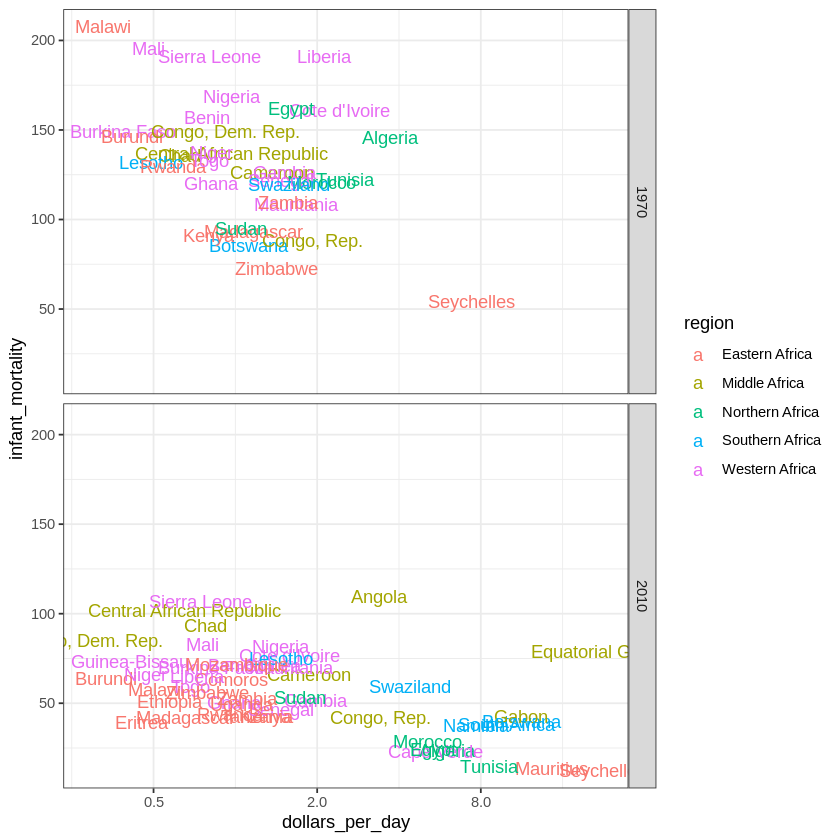

In [55]:
# scatter plot adding lables and comparing between years
data <- gapminder %>%
    filter(continent == "Africa" & year %in% c(1970,2010) & !is.na(gdp)& !is.na(infant_mortality)) %>%
    mutate(dollars_per_day = gdp/population/365)

ggplot(data, aes(dollars_per_day,infant_mortality, color = region, label=country)) +
    scale_x_continuous( trans = "log2") +
    geom_text() +
    facet_grid(year ~ .)

# Data Visualization

Visual cues for encoding data include:
* position
* length
* angle
* area
* brightness
* color hue.

Position and length are the preferred way to display quantities, followed by angles, which are preferred over area. Brightness and color are even harder to quantify but can sometimes be useful.

Bar plots represent visual cues as position and length. Humans are good at visually quantifying linear measures, making bar plots a strong alternative to pie or donut charts.

When using bar plots, we'll always start at $0$. It is deceptive not to start at $0$ because bar plots imply length is proportional to the quantity displayed. Cutting off the y-axis can make differences look bigger than they actually are. Notice that when using position rather than length, it is not necessary to include $0$ (scatterplot, dot plot, boxplot).

It is easiest to visually extract information from a plot when categories are ordered by a meaningful value. The exact value on which to order will depend on your data and the message you wish to convey with your plot.

Key points in visualizing data:

* Ease comparisons by keeping axes the same when comparing data across multiple
plots.

* Align plots vertically to see horizontal changes. Align plots horizontally to see vertical changes.

* Bar plots are useful for showing one number but not useful for showing distributions.

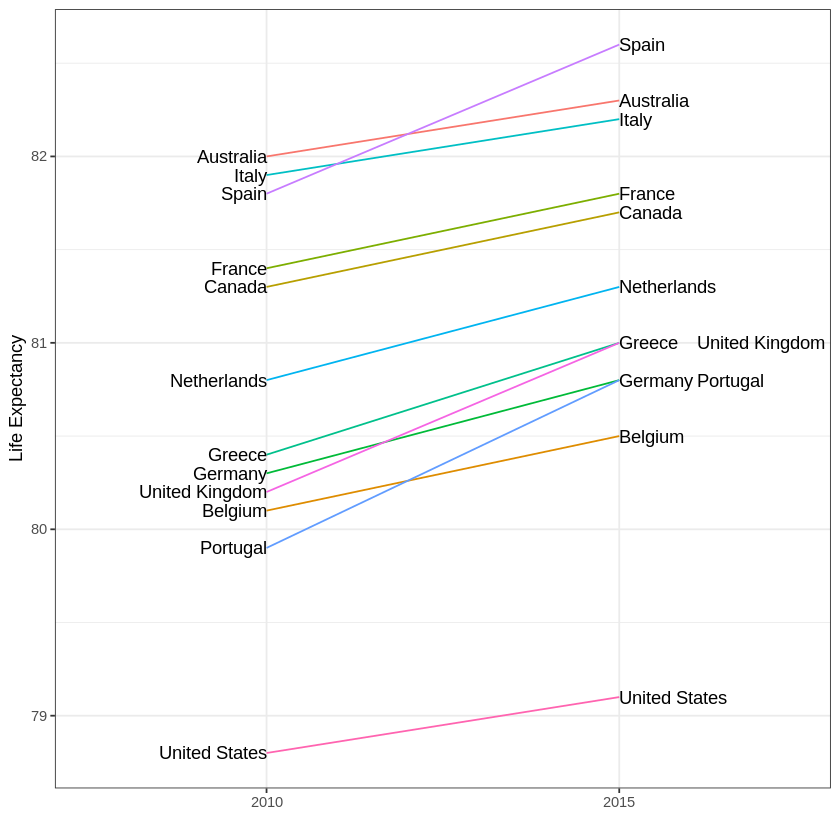

In [56]:
# slope chart
west <- c("Western Europe", "Northern Europe", "Southern Europe", "Northern America", "Australia and New Zealand")

dat <- gapminder %>%
    filter(year %in% c(2010, 2015) & region %in% west & !is.na(life_expectancy) & population > 10^7)

dat %>%
    mutate(location = ifelse(year == 2010, 1, 2),
           location = ifelse(year == 2015 & country %in% c("United Kingdom", "Portugal"),
                             location + 0.22, location),
           hjust = ifelse(year == 2010, 1, 0)) %>%
    mutate(year = as.factor(year)) %>%
    ggplot(aes(year, life_expectancy, group = country)) +
    geom_line(aes(color = country), show.legend = FALSE) +
    geom_text(aes(x = location, label = country, hjust = hjust), show.legend = FALSE) +
    xlab("") +
    ylab("Life Expectancy")

We consider using a `slope chart` or `Bland-Altman plot` when comparing one variable at two different time points, especially for a small number of observations.

Slope charts use angle to encode change. We use `geom_line()` to create slope charts. It is useful when comparing a small number of observations.

The `Bland-Altman plot` (Tukey mean difference plot, MA plot) graphs the difference between conditions on the y-axis and the mean between conditions on the x-axis. It is more appropriate for large numbers of observations than slope charts.

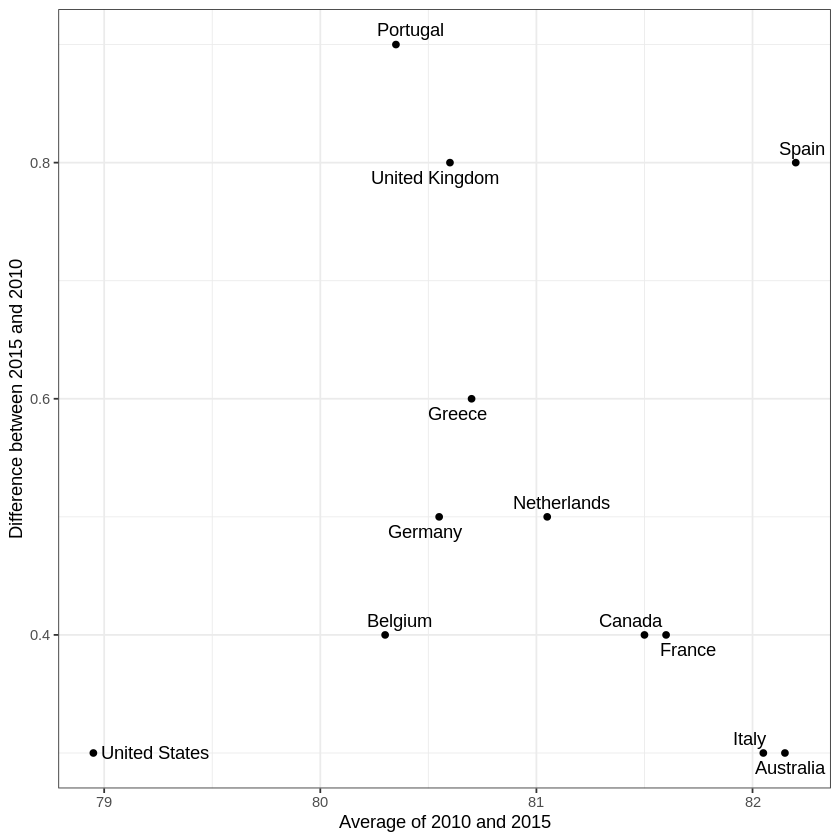

In [57]:
# Bland-Altman plot
dat %>%
    mutate(year = paste0("life_expectancy_", year)) %>%
    select(country, year, life_expectancy) %>% spread(year, life_expectancy) %>%
    mutate(average = (life_expectancy_2015 + life_expectancy_2010)/2,
                difference = life_expectancy_2015 - life_expectancy_2010) %>%
    ggplot(aes(average, difference, label = country)) +
    geom_point() +
    geom_text_repel() +
    geom_abline(lty = 2) +
    xlab("Average of 2010 and 2015") +
    ylab("Difference between 2015 and 2010")

# Example

Vaccines save millions of lives, but misinformation has led some to question the safety of vaccines. The data support vaccines as safe and effective. We visualize data about measles incidence in order to demonstrate the impact of vaccination programs on disease rate.

Now we'll dive a bit into color and how can it be used to better visualize information.

*Sequential* color palettes are best suited for data that span from high to low, while *Diverging* color palettes are best suited for data that are centered and diverge towards high or low values.

The `geom_tile()` geometry creates a grid of colored tiles.

Position and length are stronger cues than color for numeric values, but color can be appropriate sometimes.

'data.frame':	16065 obs. of  6 variables:
 $ disease        : Factor w/ 7 levels "Hepatitis A",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ state          : Factor w/ 51 levels "Alabama","Alaska",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ year           : num  1966 1967 1968 1969 1970 ...
 $ weeks_reporting: num  50 49 52 49 51 51 45 45 45 46 ...
 $ count          : num  321 291 314 380 413 378 342 467 244 286 ...
 $ population     : num  3345787 3364130 3386068 3412450 3444165 ...


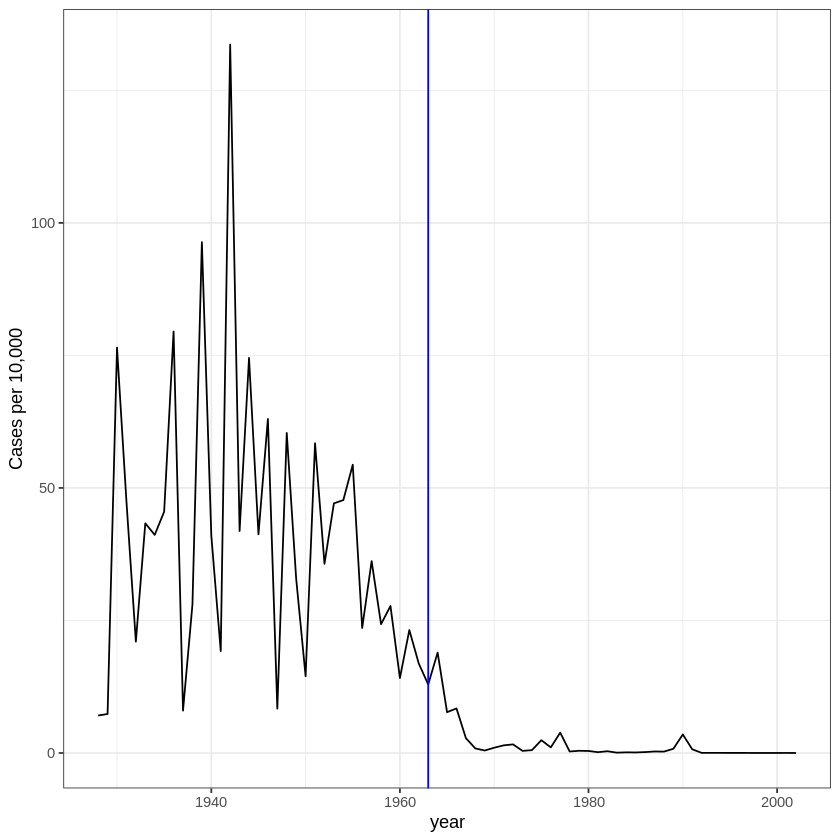

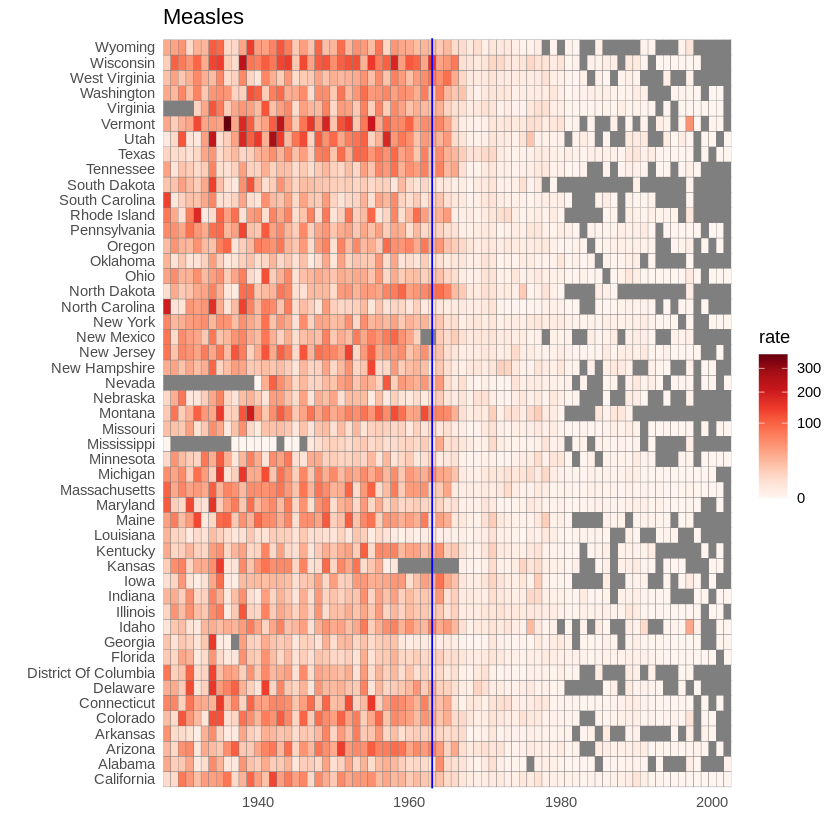

In [58]:
# Tile plot of measles rate by year and state
data(us_contagious_diseases)
str(us_contagious_diseases)

# assign dat to the per 10,000 rate of measles, removing Alaska and Hawaii and adjusting for weeks reporting
the_disease <- "Measles"
dat <- us_contagious_diseases %>%
    filter(!state %in% c("Hawaii", "Alaska") & disease == the_disease) %>%
    mutate(rate = count / population * 10000 * 52/weeks_reporting) %>%
    mutate(state = reorder(state, rate))

# plot disease rates per year in California
dat %>% filter(state == "California" & !is.na(rate)) %>%
    ggplot(aes(year, rate)) +
    geom_line() +
    ylab("Cases per 10,000") +
    geom_vline(xintercept=1963, col = "blue")

# tile plot of disease rate by state and year
dat %>% ggplot(aes(year, state, fill=rate)) +
    geom_tile(color = "grey50") +
    scale_x_continuous(expand = c(0,0)) +
    scale_fill_gradientn(colors = RColorBrewer::brewer.pal(9, "Reds"), trans = "sqrt") +
    geom_vline(xintercept = 1963, col = "blue") +
    theme_minimal() + theme(panel.grid = element_blank()) +
    ggtitle(the_disease) +
    ylab("") +
    xlab("")

Next we'll show the line plot of measles rate by year and by state in the US. As before, we'll mark with a blue line the year (1963) at which vaccines were inserted and distributed into the population.

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


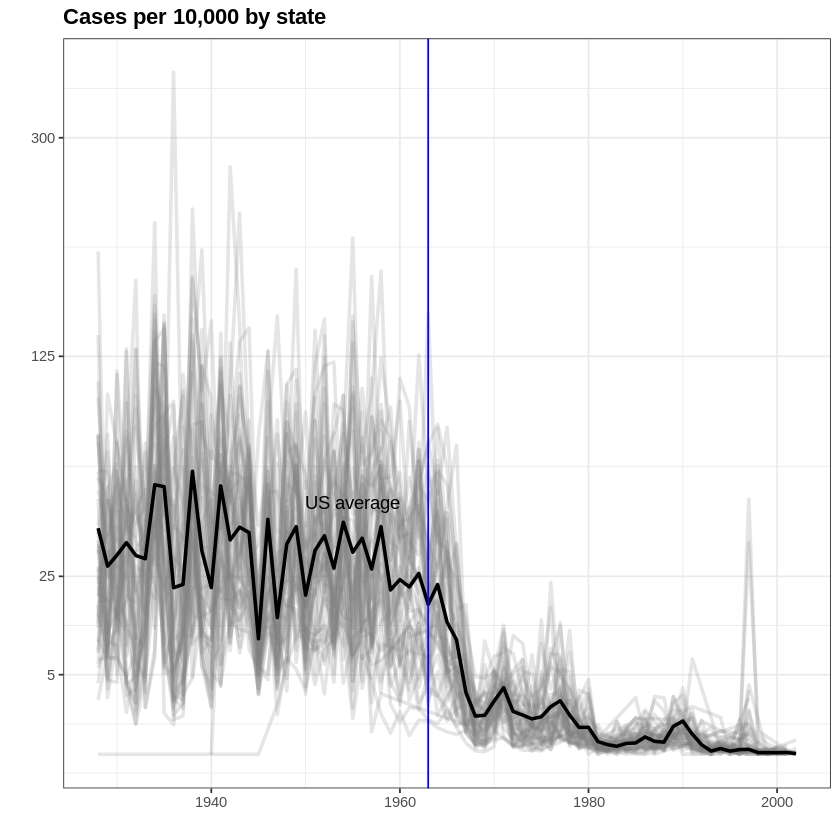

In [59]:
# Line plot of measles rate by year and state
# compute US average measles rate by year
avg <- us_contagious_diseases %>%
    filter(disease == the_disease) %>% group_by(year) %>%
    summarize(us_rate = sum(count, na.rm = TRUE)/sum(population, na.rm = TRUE)*10000)

# make line plot of measles rate by year by state
dat %>%
    filter(!is.na(rate)) %>%
    ggplot() +
    geom_line(aes(year, rate, group = state), color = "grey50",
        show.legend = FALSE, alpha = 0.2, size = 1) +
    geom_line(mapping = aes(year, us_rate), data = avg, size = 1, col = "black") +
    scale_y_continuous(trans = "sqrt", breaks = c(5, 25, 125, 300)) +
    ggtitle("Cases per 10,000 by state") +
    xlab("") +
    ylab("") +
    geom_text(data = data.frame(x = 1955, y = 50),
        mapping = aes(x, y, label = "US average"), color = "black") +
    geom_vline(xintercept = 1963, col = "blue")

# Titanic Example

In this exmple the aim is to visualize the percentage of people that survived the accdent, vs the percentage that did not, and try to see if there's any relationship between both sides that may have influenced the outcome.

First we'll take a look at the table to see how it's composed.

In [60]:
# report 3 significant digits
options(digits = 3)
titanic <- titanic_train %>%
    select(Survived, Pclass, Sex, Age, SibSp, Parch, Fare) %>%
    mutate(Survived = factor(Survived),
           Pclass = factor(Pclass),
           Sex = factor(Sex))
head(titanic)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
,<fct>,<fct>,<fct>,<dbl>,<int>,<int>,<dbl>
1,0,3,male,22,1,0,7.25
2,1,1,female,38,1,0,71.28
3,1,3,female,26,0,0,7.92
4,1,1,female,35,1,0,53.10
5,0,3,male,35,0,0,8.05
6,0,3,male,NA,0,0,8.46


Now we'll plot a density plot of the age of the male and female passangers of the Titanic

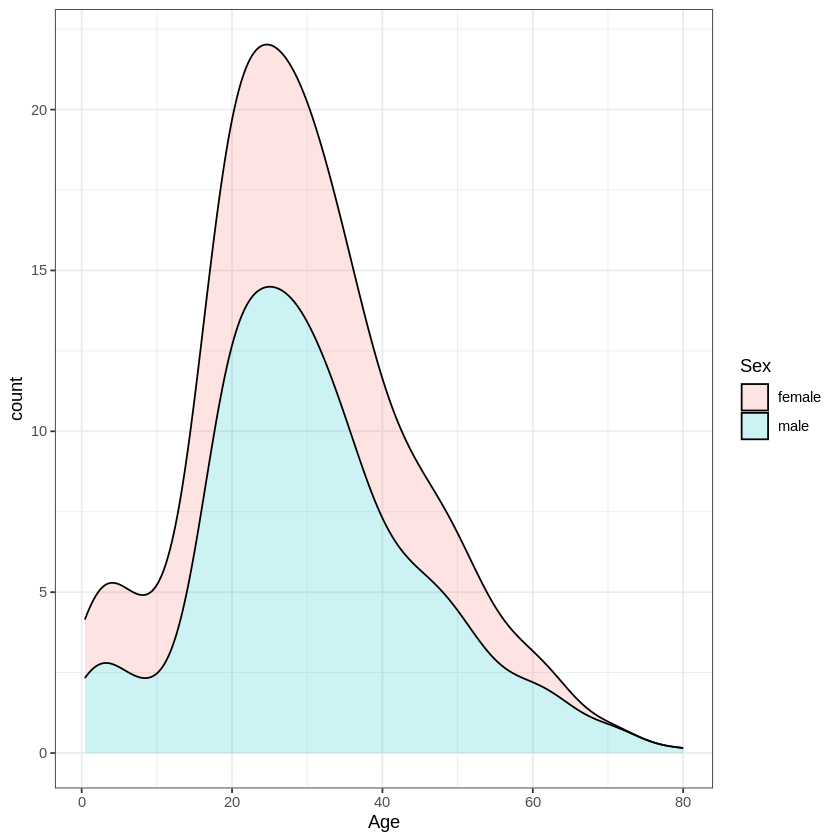

In [61]:
# density plot for ages of male and females
p <- titanic %>%
    filter(!is.na(Age)) %>%
    group_by(Sex) %>%
    ggplot(aes(Age, y = ..count.., fill = Sex))
p + geom_density(alpha = 0.2, position = "stack")

What information can we obtain from this plot?

Females and males had the same general shape of age distribution, as can be seen, the age distribution was bimodal, with one mode around 25 years of age and a second smaller mode around 5 years of age.

The count of males of age 40 was higher than the count of females of age 40, but the proportion of males age 18-35 was higher than the proportion of females age 18-35.

Finally, we can see that the proportion of females under age 17 was higher than the proportion of males under age 17.

Now we'll use the `geom_qq()` function to make a *QQ-plo*t of passenger age and add an identity line with `geom_abline()`, filtering out any individuals with an age of NA first

Warning message:
“Removed 177 rows containing non-finite outside the scale range (`stat_qq()`).”


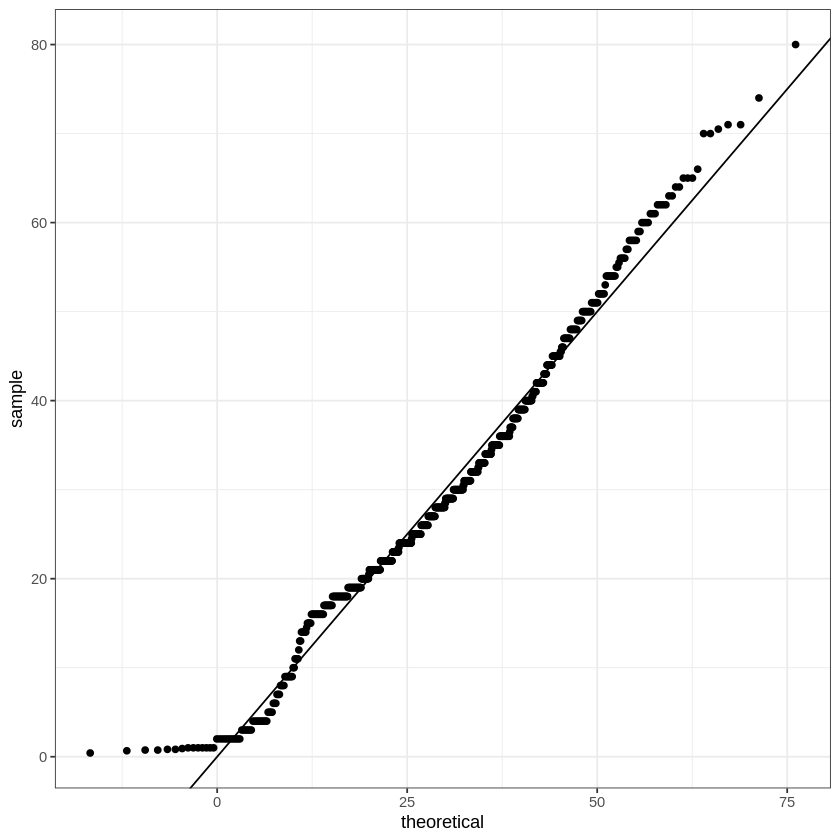

In [62]:
# QQ-plot of passenger's age
params <- titanic %>%
    filter(!is.na(Age)) %>%
    summarize(mean = mean(Age), sd = sd(Age))
p3 <- ggplot(titanic, aes(sample = Age))
p3 <- p3 + stat_qq(distribution = qnorm, dparams = list(mean = params$mean, sd = params$sd))
p3 <- p3 + geom_abline()
p3

Now we're going to plot the bar plot corresponding to the passangers that did or didn't survive, differentiating by sex.

Survived,Pclass,Sex,Age,SibSp,Parch,Fare
<fct>,<fct>,<fct>,<dbl>,<int>,<int>,<dbl>
0,3,male,22,1,0,7.25
1,1,female,38,1,0,71.28
1,3,female,26,0,0,7.92
1,1,female,35,1,0,53.10
0,3,male,35,0,0,8.05
0,3,male,NA,0,0,8.46


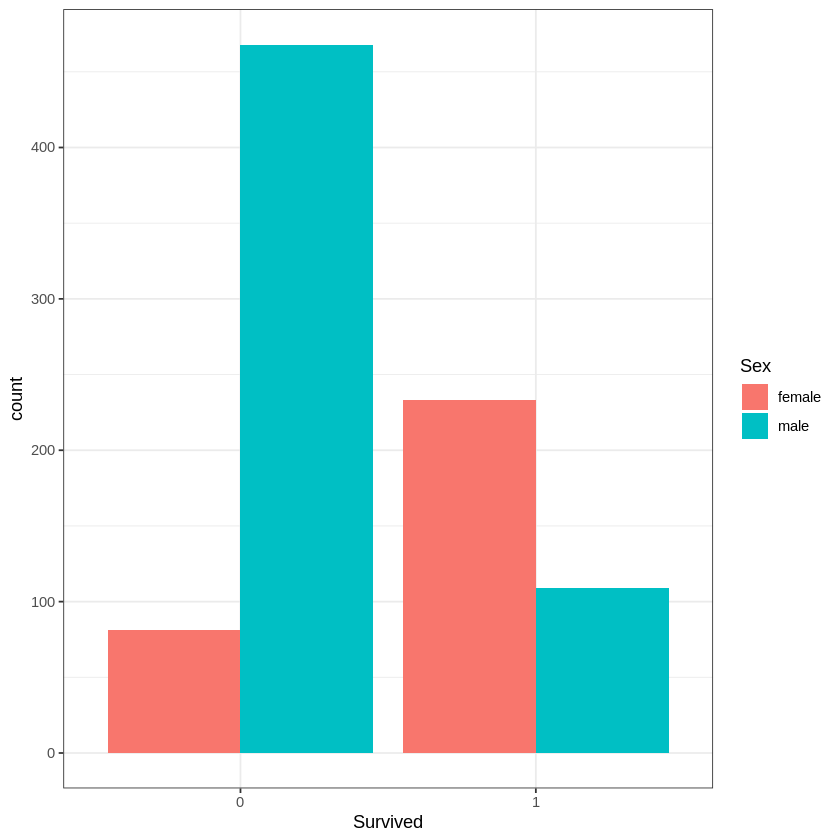

In [63]:
# bar plot of the deceased and survivors differentiating by sex
titanic_data <- titanic %>%
    filter(!is.na(Sex)) %>%
    group_by(Sex)
head(titanic_data)

ggplot(titanic_data, aes(Survived, fill = Sex)) +
  geom_bar(position = position_dodge())

From this plot we can learn that less than half of passengers survived, that most of the survivors were female, and even that most of the females survived.

Below is the density plot of the age of the people that did and did not survive.

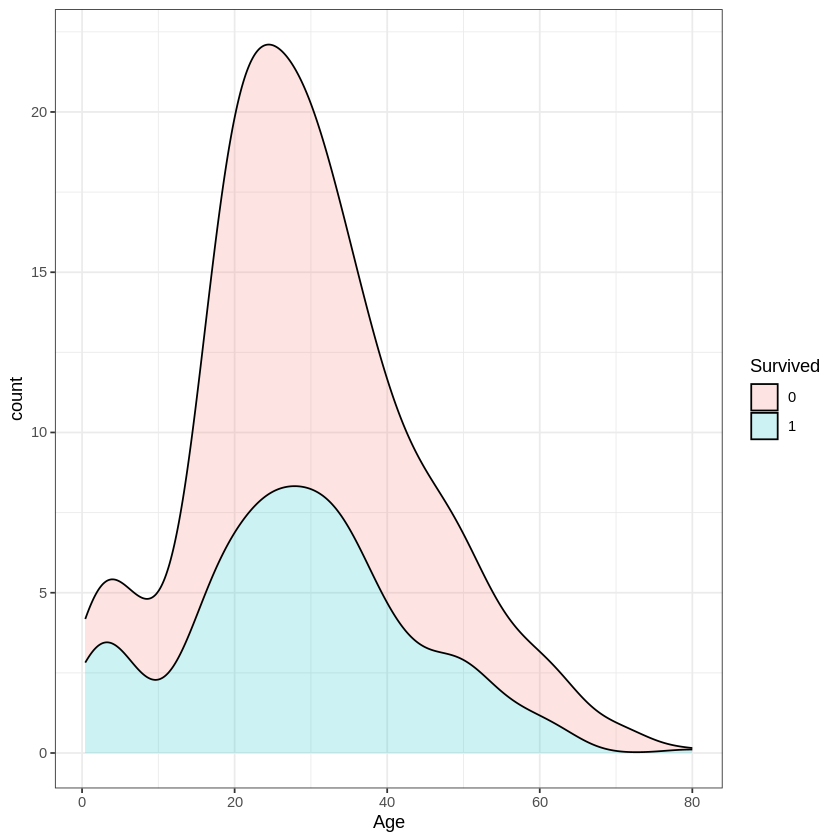

In [64]:
# density plot of the age of the people in the titanic
p <- titanic %>%
    filter(!is.na(Age)) %>%
    #group_by(Sex) %>%
    ggplot(aes(Age, y = ..count.., fill = Survived))
p + geom_density(alpha = 0.2, position = "stack")

From this plot we can get that the age group that was more likely to survive was from 0 to 8 years. That the group which had more deaths was from 18 to 30 years, and that the group had the highest proportion of deaths was from 70 to 80 years.

Below plot shows the data points of the deceased and survivors, and the fare each one paid on the titanic is shown as a boxplot over the points.

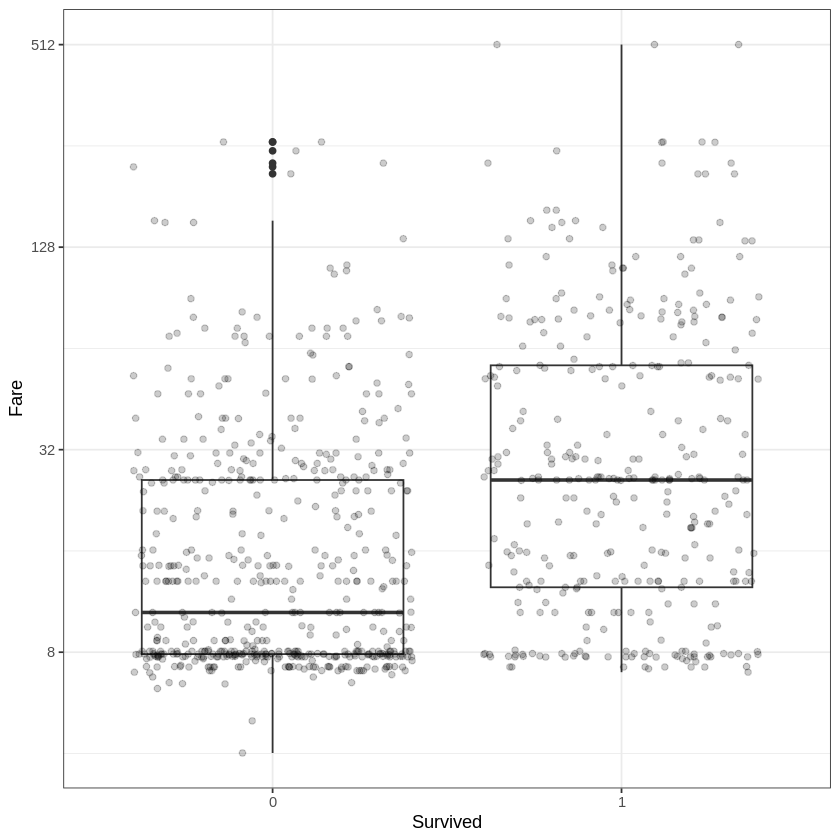

In [65]:
titanic %>%
    filter(Fare > 0) %>%
    ggplot(aes(Survived, Fare)) +
    geom_boxplot() +
    scale_y_continuous(trans = "log2") +
    geom_jitter(alpha = 0.2)

It can be seen that passengers who survived generally payed higher fares than those who did not survive.

In addition, the median fare was lower for passengers who did not survive, and most individuals who paid a fare around $8 did not survive.

Next we'll graph bar plots for the passengers for the different classes that were on board, and we'll compare the group that survived with the group that didn't. The first bar plot shows the total ammount for people of 1st, 2nd and 3rd class, and in different colors the amount of pleople that survived (blue) and the ones that didn't (pink).

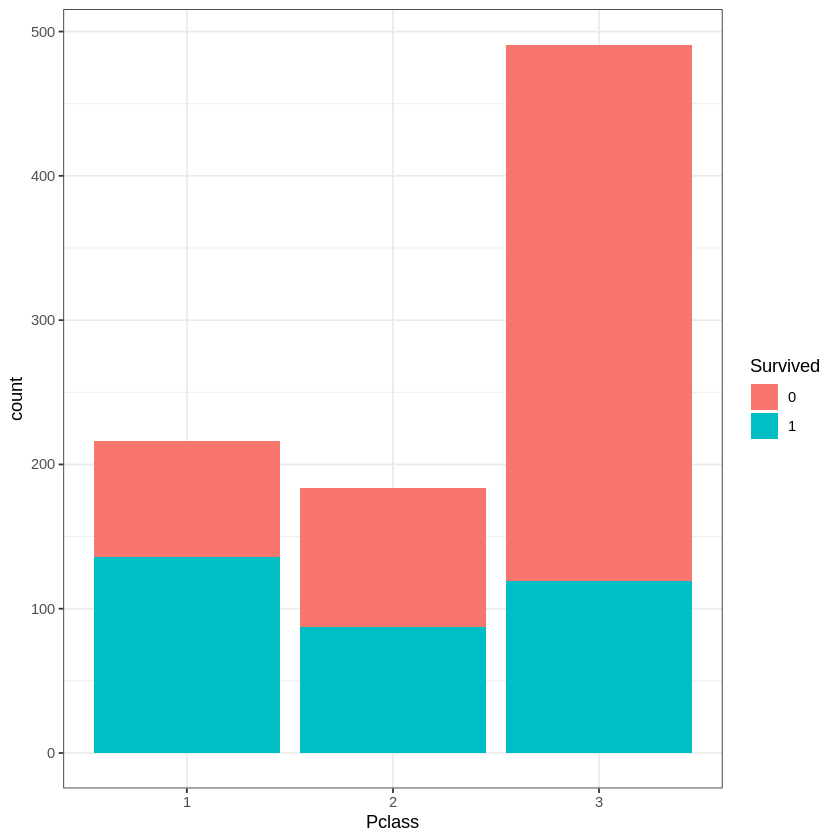

In [66]:
# bar plot of the ammount of people that did and didn't survive by class.
titanic %>%
    ggplot(aes(Pclass, fill=Survived)) +
    geom_bar()

From this plot we see that there were more third class passengers than passengers in the first two classes combined.

Following is the normalized bar plot with the same divisions as before, but notice that this time, all classes add up to $1$, and in different colors is shown the percentage of the people that survived on each class.

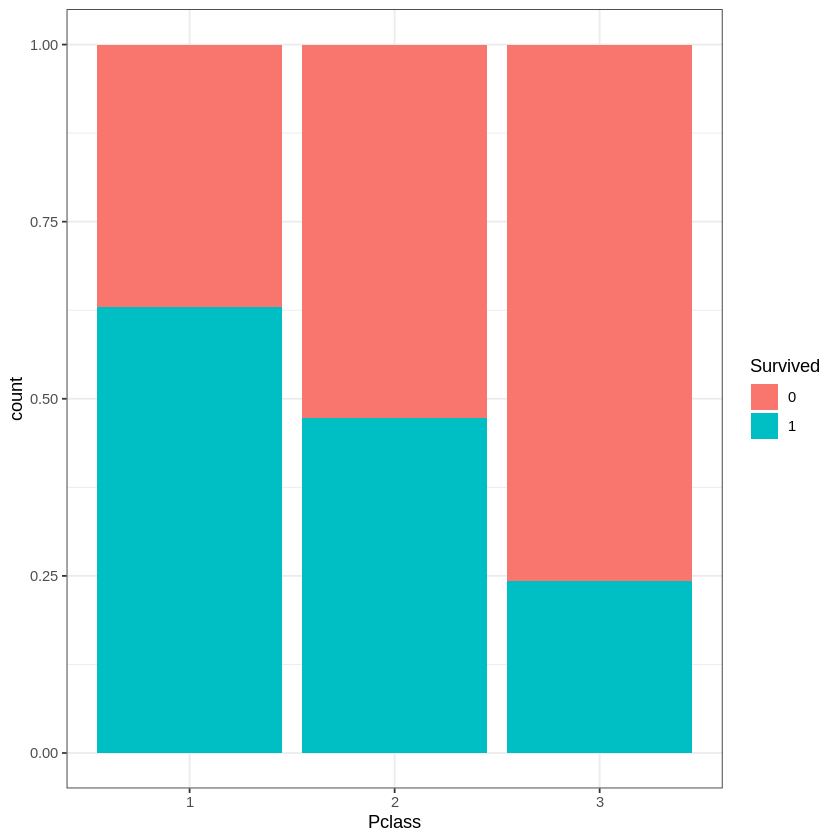

In [67]:
# normalized bar plot of the people in each class
titanic %>%
    ggplot(aes(Pclass, fill=Survived)) +
    geom_bar(position = position_fill())

Different information can be extracted from here.

For example, we see that the survival proportion was highest for first class passengers, followed by second class, and that third-class had the lowest survival proportion.

We can also see that most passengers in first class survived, but most passengers in other two classes did not survive.

Finally, we show the bar plot of the people that did and did not survive, and we separate the proportion of people that corresponds to each class.

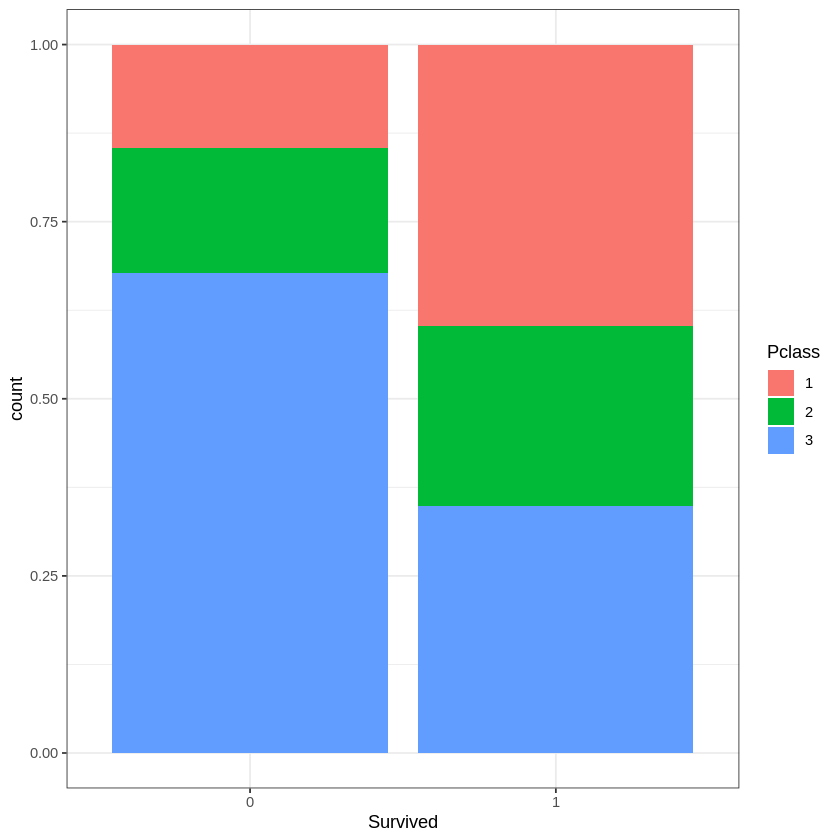

In [68]:
# bar plot of the people that did and did not survive
titanic %>%
    ggplot(aes(Survived, fill=Pclass)) +
    geom_bar(position = position_fill())

By ploting the same data but in a different manner, we can see, for example, that the majority (>50%) of those who did not survive were from third class.

With all these views of the same data, we can extract different pieces of information and get a better understanding of the relationship between the observed variables.

Lastly, we'll show with a density plot of the passenger's age, separated by sex, the proportion of people that survived for each class.

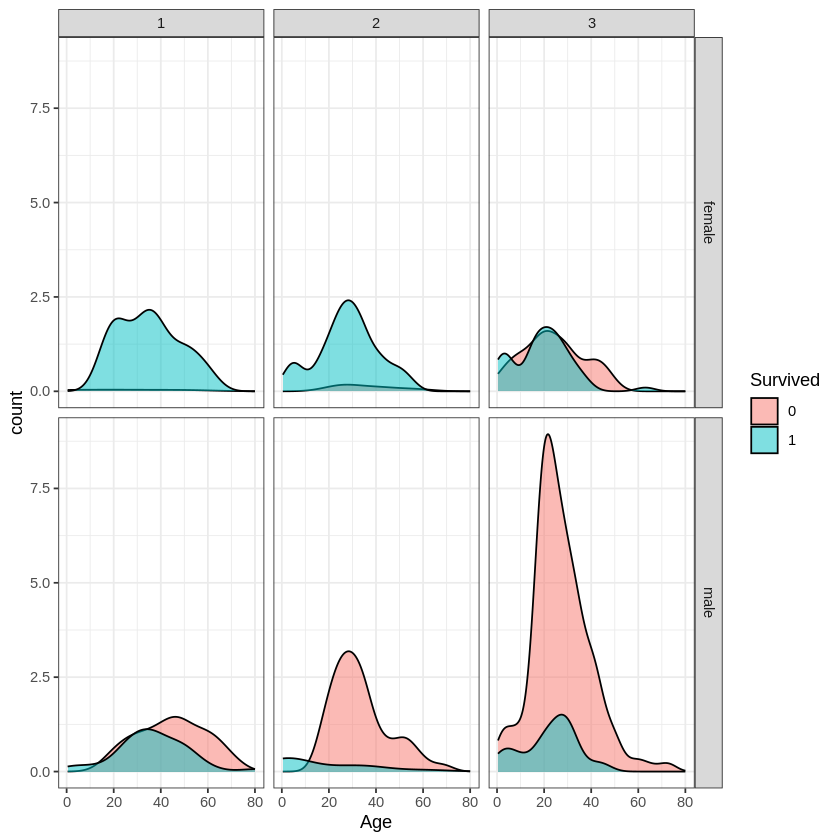

In [69]:
# density plot of the passenger's age, separated by sex and by class
p <- titanic %>%
    filter(!is.na(Age)) %>%
    ggplot(aes(Age, y = ..count.., fill = Survived))
p + geom_density(alpha = 0.5) +
    facet_grid(Sex~Pclass)

In these set of plots we can see that the largest group of passengers was third-class males, that most first-class and second-class females survived,and that almost all second-class males did not survive, with the exception of children.

# Conclussion



This Colab is dedicated to demonstrating the significance of data visualization as a powerful tool for extracting insights from data through the creation of clear and informative plots.

We have utilized a range of R libraries to craft our graphs and examples, with ggplot2 serving as the primary tool. This versatile data visualization package has allowed us to explore various methods of filtering and presenting data in an organized and intuitive manner.

Throughout this Colab, we have examined line plots, histograms, box plots, and density plots—each serving as a valuable visualization technique for narrating data stories. When combined with fundamental statistical concepts, these visualizations become indispensable assets in any data analysis portfolio.

In conclusion, mastering data visualization not only enhances the clarity of data presentations but also equips analysts with the means to convey complex insights effectively. By integrating these visual techniques with a strong statistical foundation, we can transform raw data into compelling narratives that drive informed decision-making.